## Desafio Economapas - Engenheiro de Dados

# Autor: Anselmo de Souza Pontes Junior



## Descrição geral do desafio.

Neste desafio, teremos a oportunidade de trabalhar com dados relacionados à prospecção de potenciais clientes (leads) e aos clientes convertidos, com o objetivo de oferecer recomendações valiosas ao setor de marketing. Nosso objetivo é identificar padrões, tendências e relações importantes que nos permitam otimizar a taxa de conversão de leads em clientes. Utilizaremos técnicas de visualização de dados e estatísticas para fornecer recomendações sólidas que auxiliarão na tomada de decisões estratégicas, visando alcançar o maior sucesso possível em futuras campanhas e investimentos de marketing.

## 1ª Etapa Organização dos dados.

Inicialmente a base de dados para o desafio era o arquivo 'Desafio Economapas - Eng de Dados.xlsx'.Por questões práticas,converteremos todas as tabelas deste arquivo em um único arquivo .csv.Tal escolha é particularmente útil para manusear os dados utilizando a biblioteca Pandas.

In [1]:
#Importando bibliotecas
#Ajuste de plots
%matplotlib inline 

#plots
import matplotlib as mpl
import matplotlib.pyplot as plt
#Processamento de Dados
import pandas as pd
#Manipulações Matemáticas
import numpy as np
#Visualizações
import seaborn as sns

In [2]:
#Criando DataFrames para as tabelas

base_df = pd.read_excel('Desafio Economapas - Eng de dados.xlsx', sheet_name='BASE')
origem_df = pd.read_excel('Desafio Economapas - Eng de dados.xlsx', sheet_name='ORIGEM')
mercado_df = pd.read_excel('Desafio Economapas - Eng de dados.xlsx', sheet_name='MERCADO')
local_df = pd.read_excel('Desafio Economapas - Eng de dados.xlsx', sheet_name='LOCAL')
porte_df = pd.read_excel('Desafio Economapas - Eng de dados.xlsx', sheet_name='PORTE')
objetivo_df = pd.read_excel('Desafio Economapas - Eng de dados.xlsx', sheet_name='OBJETIVO')





In [3]:
# Definindo a coluna comum de junção (LEAD_ID)
coluna_juncao = 'LEAD_ID'

# Fazendo o merge das tabelas usando a função merge do pandas
# Aqui, estamos utilizando o método 'left' para manter todas as linhas do DataFrame 'base_df'
# e combinando as informações das outras tabelas com base no LEAD_ID
merged_df = base_df.merge(origem_df, on=coluna_juncao, how='left')
merged_df = merged_df.merge(mercado_df, on=coluna_juncao, how='left')
merged_df = merged_df.merge(local_df, on=coluna_juncao, how='left')
merged_df = merged_df.merge(porte_df, on=coluna_juncao, how='left')
merged_df = merged_df.merge(objetivo_df, on=coluna_juncao, how='left')

# Agora temos um DataFrame consolidado contendo todas as informações das tabelas unidas
# Podemos salvar esse DataFrame em um arquivo CSV
merged_df.to_csv('dados_unificados.csv', index=False)  # O parâmetro index=False evita salvar o índice do DataFrame no CSV

print("Todas as tabelas foram unidas e os dados foram salvos em 'dados_unificados.csv'.")


Todas as tabelas foram unidas e os dados foram salvos em 'dados_unificados.csv'.


In [4]:
# Carregar o conjunto de dados unificados do arquivo CSV para a variável df
df = pd.read_csv('dados_unificados.csv')

# Agora você pode trabalhar com o DataFrame df, que contém todos os dados unificados.
# Por exemplo, você pode usar a função head() para visualizar as primeiras linhas do DataFrame:
print(df.head())


    LEAD_ID        DATA CADASTRO VENDIDO MERCADO_x            ORIGEM  \
0  11316042  2021-02-10 16:23:30     NÃO    Varejo          Orgânico   
1  11374979  2021-02-17 11:10:28     NÃO    Varejo          Orgânico   
2  11997870  2021-04-15 11:06:00     NÃO    Varejo  Prospecção Ativa   
3  11930537  2021-04-09 13:10:21     NÃO    Varejo  Prospecção Ativa   
4  11899381  2021-04-07 13:13:49     NÃO    Varejo  Prospecção Ativa   

        SUB-ORIGEM MERCADO_y          LOCAL  PORTE           OBJETIVO  
0              NaN    Varejo     Belém - PA   1-10  Abertura/Expansão  
1              NaN    Varejo  São Paulo, SP  11-50                NaN  
2  Sales Navigator    Varejo              -    NaN                NaN  
3  Sales Navigator    Varejo              -    NaN                NaN  
4  Sales Navigator    Varejo              -    NaN                NaN  


In [5]:
# Aqui temos uma visão geral do nosso DataFrame
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2333 entries, 0 to 2332
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   LEAD_ID        2333 non-null   int64 
 1   DATA CADASTRO  2333 non-null   object
 2   VENDIDO        2333 non-null   object
 3   MERCADO_x      2333 non-null   object
 4   ORIGEM         2333 non-null   object
 5   SUB-ORIGEM     1495 non-null   object
 6   MERCADO_y      2238 non-null   object
 7   LOCAL          2333 non-null   object
 8   PORTE          2138 non-null   object
 9   OBJETIVO       2120 non-null   object
dtypes: int64(1), object(9)
memory usage: 182.4+ KB


A célula acima nos dá informações sobre nomes,tipo e entradas nulas de todas as colunas.Durante o processo de criação do DataFrame duas colunas com a mesma informação (MERCADO) acabaram sendo produzidas.Abaixo eliminamos uma delas.A questão de termos entradas nulas em algumas colunas será tratada futuramente.

In [6]:
# Verificar se as colunas 'MERCADO_x' e 'MERCADO_y' são diferentes
if not df['MERCADO_x'].equals(df['MERCADO_y']):
    # Encontrar as linhas onde as colunas são diferentes
    linhas_diferentes = df[df['MERCADO_x'] != df['MERCADO_y']]
    # Imprimir as linhas onde ocorrem as diferenças
    print("As colunas 'MERCADO_x' e 'MERCADO_y' são diferentes nas seguintes linhas:")
    print(linhas_diferentes)
else:
    # Se as colunas forem iguais, manter apenas a coluna 'MERCADO_x'
    df = df.drop(columns=['MERCADO_y'])

# Agora o DataFrame df terá apenas a coluna 'MERCADO_x', caso as colunas sejam diferentes.


As colunas 'MERCADO_x' e 'MERCADO_y' são diferentes nas seguintes linhas:
       LEAD_ID        DATA CADASTRO VENDIDO MERCADO_x  ORIGEM  \
28    10566142  2020-12-01 05:46:39     NÃO         0  Google   
29    10572176  2020-12-01 12:26:28     NÃO         0  Google   
30    10581011  2020-12-01 18:02:28     NÃO         0  Google   
31    10621157  2020-12-05 09:53:30     NÃO         0  Google   
32    10608029  2020-12-03 17:10:25     NÃO         0  Google   
...        ...                  ...     ...       ...     ...   
2168  10595388  2020-12-02 22:04:37     NÃO         0  Google   
2169  10595392  2020-12-02 22:05:41     NÃO         0  Google   
2170  10578265  2020-12-01 15:57:12     NÃO         0  Google   
2171  10578279  2020-12-01 15:58:04     NÃO         0  Google   
2172  10628730  2020-12-07 10:35:30     NÃO         0     rep   

                 SUB-ORIGEM MERCADO_y                      LOCAL     PORTE  \
28             google - cpc       NaN             Cariacica - ES   

In [7]:
#Vamos manter apenas uma coluna Mercado
df = df.drop(columns=['MERCADO_y'])


## Etapa 2: Análise de dados e Visualizações gerais

Nosso objetivo principal é compreender como maximizar a taxa de conversão de leads,então é natural analisar este fator com respeito as diversas features que temos disponíveis.Nós possuímos diversos fatores úteis para a segmentação de clientes como:

- Localização(LOCAL)

- Porte(PORTE)

- Área de Atuação(MERCADO)

- Canal de Comunicação(ORIGEM)

- Objetivo(OBJETIVO)

Observação: A data de cadastro também pode ser uma ferramenta interessante.Por exemplo para determinar se existe uma sazonalidade mais favorável para a conversão de Leads,contudo este problema não foi considerado na presente análise.

Abaixo temos a contagem do total de Leads.

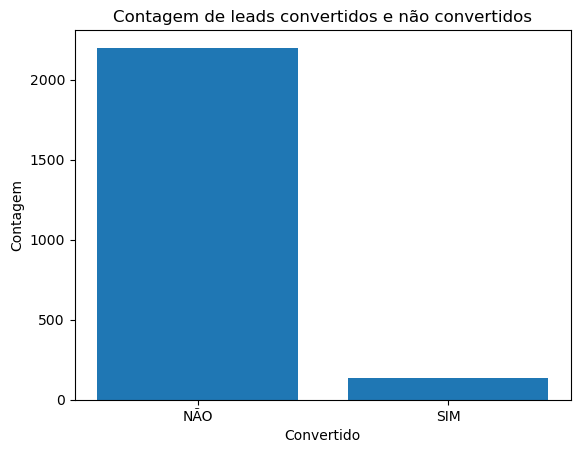

In [8]:
# Contar a ocorrência de cada valor na coluna 'VENDIDO'
contagem_vendido = df['VENDIDO'].value_counts()

# Criar o gráfico de barras
plt.bar(contagem_vendido.index, contagem_vendido.values)

# Definir os rótulos do eixo x e y
plt.xlabel('Convertido')
plt.ylabel('Contagem')

# Definir o título do gráfico
plt.title('Contagem de leads convertidos e não convertidos')

# Mostrar o gráfico
plt.show()


Observação importante! O nosso dataset possui a variável de interesse(target) desbalanceada.

Um número que será nosso guia durante toda a análise é a taxa de conversão total,ou seja,baseada em toda nossa base de dados.Tal número é importante pois vai nos dar um parâmetro comparativo com outras taxas de conversão mais específicas.

In [9]:
# Criar um novo DataFrame para armazenar a tabela de contagem
tabela_contagem = pd.DataFrame({
    'VENDIDO': ['SIM', 'NÃO'],
    'Contagem': [contagem_vendido['SIM'], contagem_vendido['NÃO']]
})

# Calcular a taxa de conversão
total_leads = df.shape[0]
leads_convertidos = contagem_vendido['SIM']
taxa_conversao = (leads_convertidos / total_leads) * 100



# Exibir a tabela de contagem e a taxa de conversão
print(tabela_contagem)
print(f'Taxa de Conversão: {taxa_conversao:.2f}%')

  VENDIDO  Contagem
0     SIM       134
1     NÃO      2199
Taxa de Conversão: 5.74%


## Análise Geográfica

Utilizaremos o fator Geográfico como primeira variável guia para compreendermos o fenômeno de conversão de Leads.

In [10]:
# Extrair as duas últimas letras da coluna 'LOCAL' para obter a sigla do estado
df['ESTADO'] = df['LOCAL'].str[-2:]

# Exibir as primeiras linhas do DataFrame com a nova coluna 'ESTADO'
print(df.head())


    LEAD_ID        DATA CADASTRO VENDIDO MERCADO_x            ORIGEM  \
0  11316042  2021-02-10 16:23:30     NÃO    Varejo          Orgânico   
1  11374979  2021-02-17 11:10:28     NÃO    Varejo          Orgânico   
2  11997870  2021-04-15 11:06:00     NÃO    Varejo  Prospecção Ativa   
3  11930537  2021-04-09 13:10:21     NÃO    Varejo  Prospecção Ativa   
4  11899381  2021-04-07 13:13:49     NÃO    Varejo  Prospecção Ativa   

        SUB-ORIGEM          LOCAL  PORTE           OBJETIVO ESTADO  
0              NaN     Belém - PA   1-10  Abertura/Expansão     PA  
1              NaN  São Paulo, SP  11-50                NaN     SP  
2  Sales Navigator              -    NaN                NaN      -  
3  Sales Navigator              -    NaN                NaN      -  
4  Sales Navigator              -    NaN                NaN      -  


Agora vamos iniciar um procedimento que será bastante comum durante toda a análise.Vamos fixar uma feature,neste caso (ESTADO) e vamos observar os seguintes gráficos.

- Número de Leads.

- Taxa de conversão.



### Qual estado tem mais Leads?

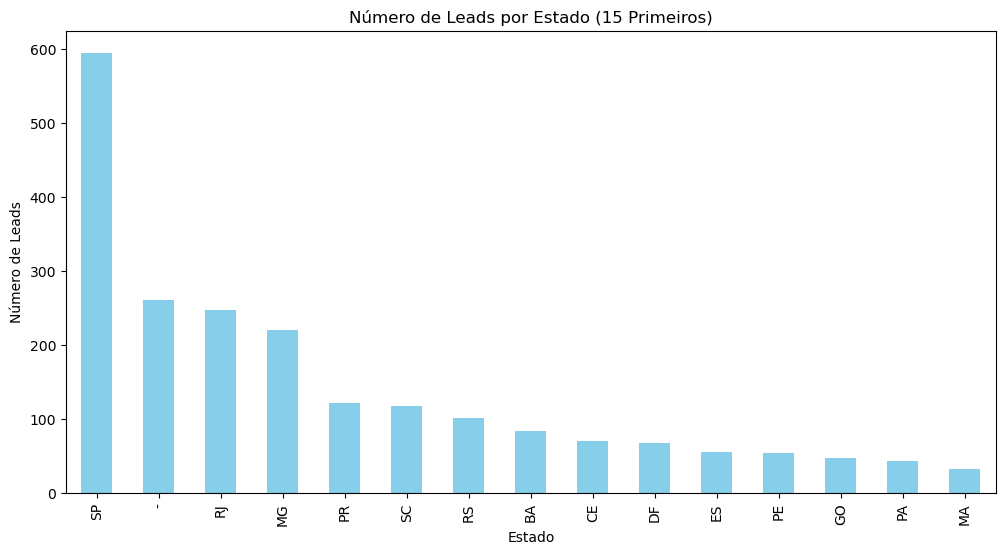

In [13]:
# Contar o número de leads por estado
contagem_leads = df['ESTADO'].value_counts()

# Selecionar apenas os 15 primeiros estados
top_15_estados = contagem_leads.head(15)

# Criar o barplot
plt.figure(figsize=(12, 6))
top_15_estados.plot(kind='bar', color='skyblue')

# Definir título e rótulos dos eixos
plt.title('Número de Leads por Estado (15 Primeiros)')
plt.xlabel('Estado')
plt.ylabel('Número de Leads')

# Girar os rótulos dos estados na vertical
plt.xticks(rotation=90)

# Exibir o barplot
plt.show()


In [14]:
#Substituir 'lo' por 'SP' em todas as ocorrências da coluna 'ESTADO'
df['ESTADO'].replace('lo', 'SP', inplace=True)

# Contar o número de leads por estado
contagem_leads = df['ESTADO'].value_counts()

# Criar uma tabela com o número de leads por estado em ordem decrescente
tabela_leads_por_estado = pd.DataFrame({
    'Estado': contagem_leads.index,
    'Número de Leads': contagem_leads.values
})

# Ordenar a tabela em ordem decrescente pelo número de leads
tabela_leads_por_estado = tabela_leads_por_estado.sort_values(by='Número de Leads', ascending=False)

# Exibir a tabela em ordem decrescente dos estados com mais leads
print(tabela_leads_por_estado)


   Estado  Número de Leads
0      SP              605
1       -              261
2      RJ              247
3      MG              221
4      PR              121
5      SC              118
6      RS              102
7      BA               84
8      CE               70
9      DF               68
10     ES               55
11     PE               54
12     GO               47
13     PA               43
14     MA               32
15     MT               32
16     RN               27
17     PB               25
18     MS               21
19     SE               20
20     AM               17
21     PI               16
22     TO               13
23     AL               12
24     RO                7
25     AC                4
26     AP                3
27     is                2
28     ro                2
29     WY                1
30     il                1
31     Pr                1
32     pe                1


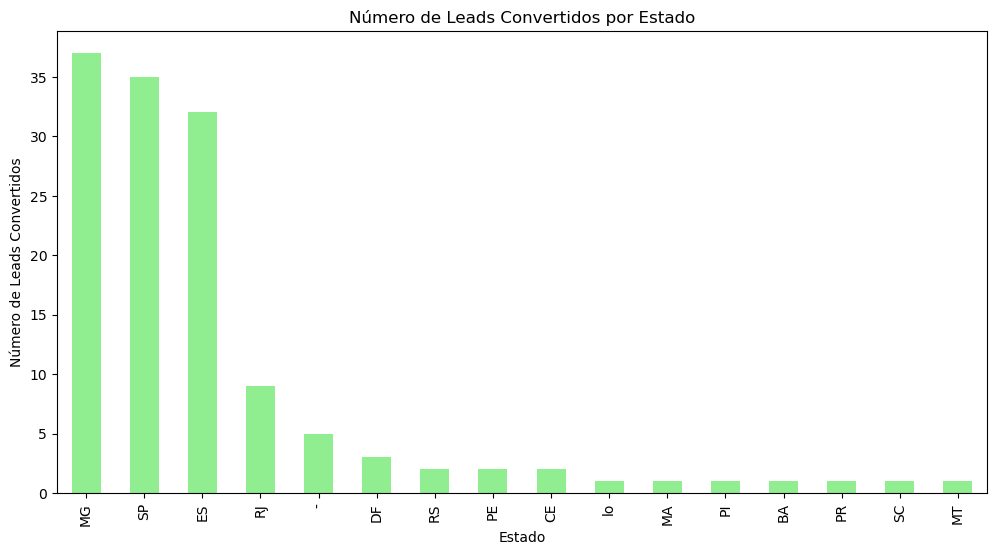

In [15]:

# Filtrar o DataFrame para incluir apenas os leads convertidos
leads_convertidos_df = df[df['VENDIDO'] == 'SIM'].copy()

# Extrair as duas últimas letras da coluna 'LOCAL' para obter a sigla do estado
leads_convertidos_df['ESTADO'] = leads_convertidos_df['LOCAL'].str[-2:]

# Contar o número de leads convertidos por estado
contagem_leads_convertidos = leads_convertidos_df['ESTADO'].value_counts()

# Criar o barplot
plt.figure(figsize=(12, 6))
contagem_leads_convertidos.plot(kind='bar', color='lightgreen')

# Definir título e rótulos dos eixos
plt.title('Número de Leads Convertidos por Estado')
plt.xlabel('Estado')
plt.ylabel('Número de Leads Convertidos')

# Girar os rótulos dos estados na vertical
plt.xticks(rotation=90)

# Exibir o barplot
plt.show()


In [16]:
# Filtrar o DataFrame para incluir apenas os leads convertidos
leads_convertidos_df = df[df['VENDIDO'] == 'SIM'].copy()

# Extrair as duas últimas letras da coluna 'LOCAL' para obter a sigla do estado
leads_convertidos_df['ESTADO'] = leads_convertidos_df['LOCAL'].str[-2:]

# Contar o número de leads convertidos por estado
contagem_leads_convertidos = leads_convertidos_df['ESTADO'].value_counts()

# Criar uma tabela com o número de leads convertidos por estado em ordem decrescente
tabela_leads_convertidos_por_estado = pd.DataFrame({
    'Estado': contagem_leads_convertidos.index,
    'Número de Leads Convertidos': contagem_leads_convertidos.values
})

# Ordenar a tabela em ordem decrescente pelo número de leads convertidos
tabela_leads_convertidos_por_estado = tabela_leads_convertidos_por_estado.sort_values(by='Número de Leads Convertidos', ascending=False)

# Exibir a tabela em ordem decrescente dos estados com mais leads convertidos
print(tabela_leads_convertidos_por_estado)



   Estado  Número de Leads Convertidos
0      MG                           37
1      SP                           35
2      ES                           32
3      RJ                            9
4       -                            5
5      DF                            3
6      RS                            2
7      PE                            2
8      CE                            2
9      lo                            1
10     MA                            1
11     PI                            1
12     BA                            1
13     PR                            1
14     SC                            1
15     MT                            1


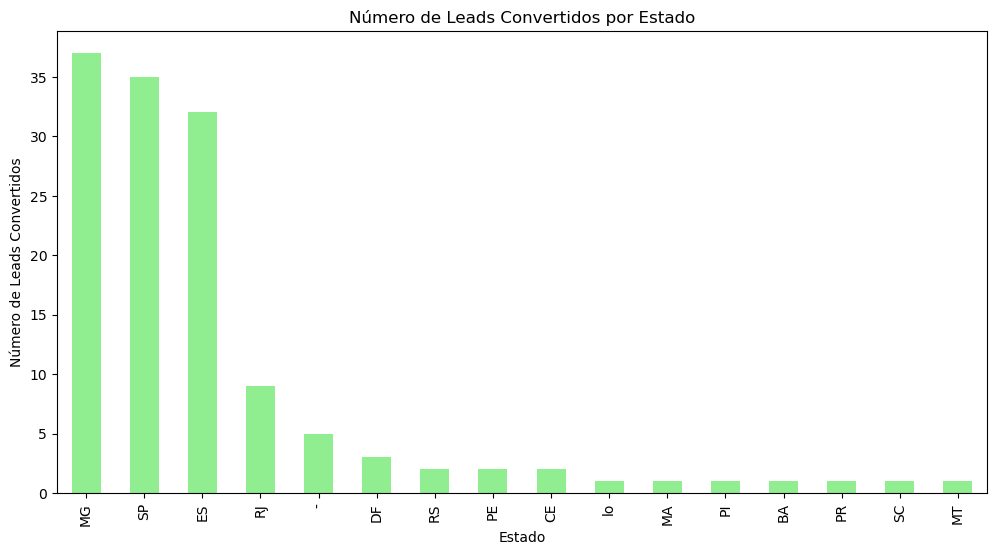

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar o conjunto de dados unificados do arquivo CSV para a variável df
df = pd.read_csv('dados_unificados.csv')

# Filtrar o DataFrame para incluir apenas os leads convertidos
leads_convertidos_df = df[df['VENDIDO'] == 'SIM'].copy()

# Extrair as duas últimas letras da coluna 'LOCAL' para obter a sigla do estado
leads_convertidos_df['ESTADO'] = leads_convertidos_df['LOCAL'].str[-2:]

# Contar o número de leads convertidos por estado
contagem_leads_convertidos = leads_convertidos_df['ESTADO'].value_counts()

# Criar o barplot
plt.figure(figsize=(12, 6))
contagem_leads_convertidos.plot(kind='bar', color='lightgreen')

# Definir título e rótulos dos eixos
plt.title('Número de Leads Convertidos por Estado')
plt.xlabel('Estado')
plt.ylabel('Número de Leads Convertidos')

# Girar os rótulos dos estados na vertical
plt.xticks(rotation=90)

# Exibir o barplot
plt.show()


### Qual estado tem maior taxa de conversão?

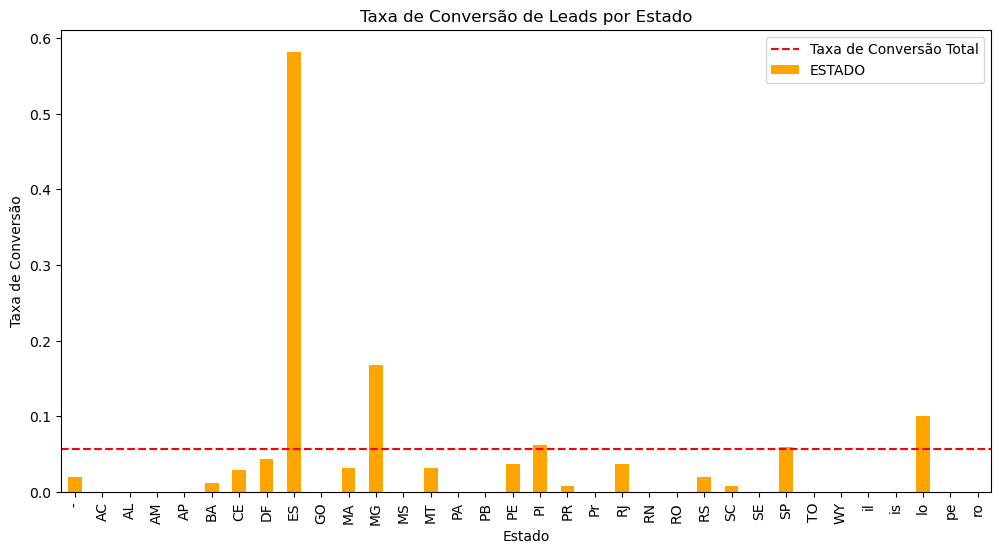

In [18]:
# Extrair as duas últimas letras da coluna 'LOCAL' para obter a sigla do estado em ambos os DataFrames
df['ESTADO'] = df['LOCAL'].str[-2:]
leads_convertidos_df = df[df['VENDIDO'] == 'SIM'].copy()
leads_convertidos_df['ESTADO'] = leads_convertidos_df['LOCAL'].str[-2:]

# Calcular o número total de leads por estado
contagem_total_leads = df['ESTADO'].value_counts()

# Calcular o número de leads convertidos por estado
contagem_leads_convertidos = leads_convertidos_df['ESTADO'].value_counts()

# Calcular a taxa de conversão de leads por estado
taxa_conversao = contagem_leads_convertidos / contagem_total_leads

# Calcular a taxa de conversão total
taxa_conversao_total = contagem_leads_convertidos.sum() / contagem_total_leads.sum()

# Criar o gráfico de taxa de conversão
plt.figure(figsize=(12, 6))
taxa_conversao.plot(kind='bar', color='orange')

# Adicionar a linha horizontal para a taxa de conversão total
plt.axhline(y=taxa_conversao_total, color='red', linestyle='--', label='Taxa de Conversão Total')

# Definir título e rótulos dos eixos
plt.title('Taxa de Conversão de Leads por Estado')
plt.xlabel('Estado')
plt.ylabel('Taxa de Conversão')

# Girar os rótulos dos estados na vertical
plt.xticks(rotation=90)

# Exibir a legenda
plt.legend()

# Exibir o gráfico de taxa de conversão
plt.show()


In [19]:
# Criar a tabela com as taxas de conversão em ordem decrescente
tabela_taxa_conversao = pd.DataFrame({
    'Estado': taxa_conversao.index,
    'Taxa de Conversão': taxa_conversao.values
})

# Ordenar a tabela em ordem decrescente pela taxa de conversão
tabela_taxa_conversao = tabela_taxa_conversao.sort_values(by='Taxa de Conversão', ascending=False)

# Exibir a tabela em ordem decrescente das taxas de conversão
print(tabela_taxa_conversao)


   Estado  Taxa de Conversão
8      ES           0.581818
11     MG           0.167421
31     lo           0.100000
17     PI           0.062500
26     SP           0.058824
7      DF           0.044118
16     PE           0.037037
20     RJ           0.036437
10     MA           0.031250
13     MT           0.031250
6      CE           0.028571
23     RS           0.019608
0       -           0.019157
5      BA           0.011905
24     SC           0.008475
18     PR           0.008264
1      AC                NaN
2      AL                NaN
3      AM                NaN
4      AP                NaN
9      GO                NaN
12     MS                NaN
14     PA                NaN
15     PB                NaN
19     Pr                NaN
21     RN                NaN
22     RO                NaN
25     SE                NaN
27     TO                NaN
28     WY                NaN
29     il                NaN
30     is                NaN
32     pe                NaN
33     ro     

### Análise por Mercado

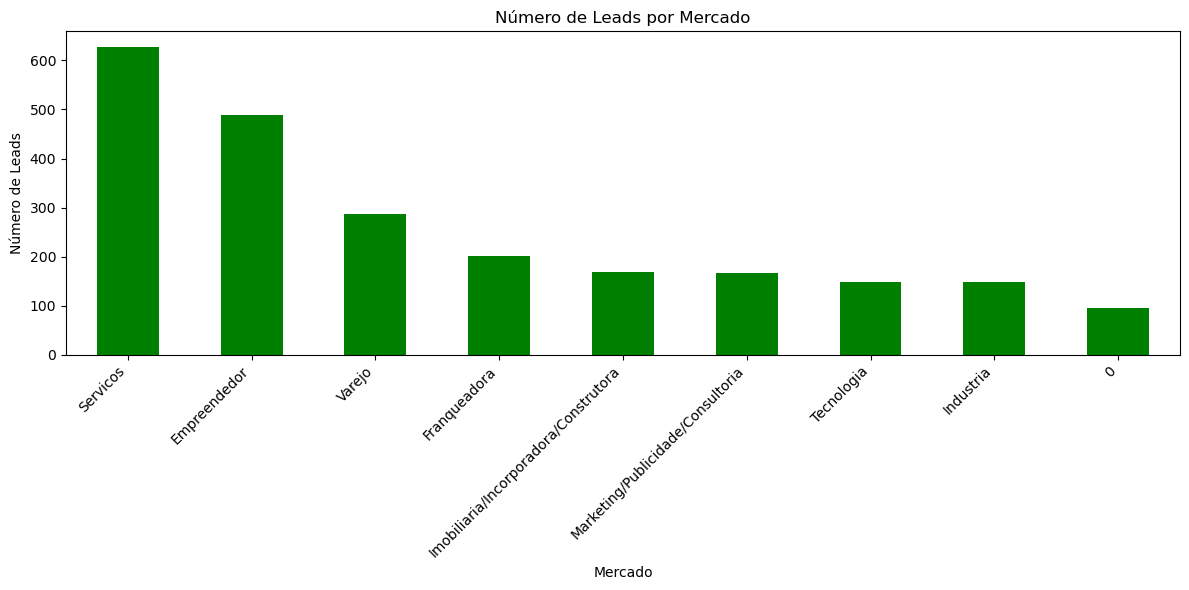

In [20]:
# Contar o número de leads para cada valor único da coluna 'MERCADO_x'
contagem_leads_por_mercado = df['MERCADO_x'].value_counts()

# Criar o gráfico de barras com o número de leads para cada valor único da coluna 'MERCADO_x'
plt.figure(figsize=(12, 6))
contagem_leads_por_mercado.plot(kind='bar', color='green')
plt.title('Número de Leads por Mercado')
plt.xlabel('Mercado')
plt.ylabel('Número de Leads')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Qual mercado tem a maior taxa de conversão?

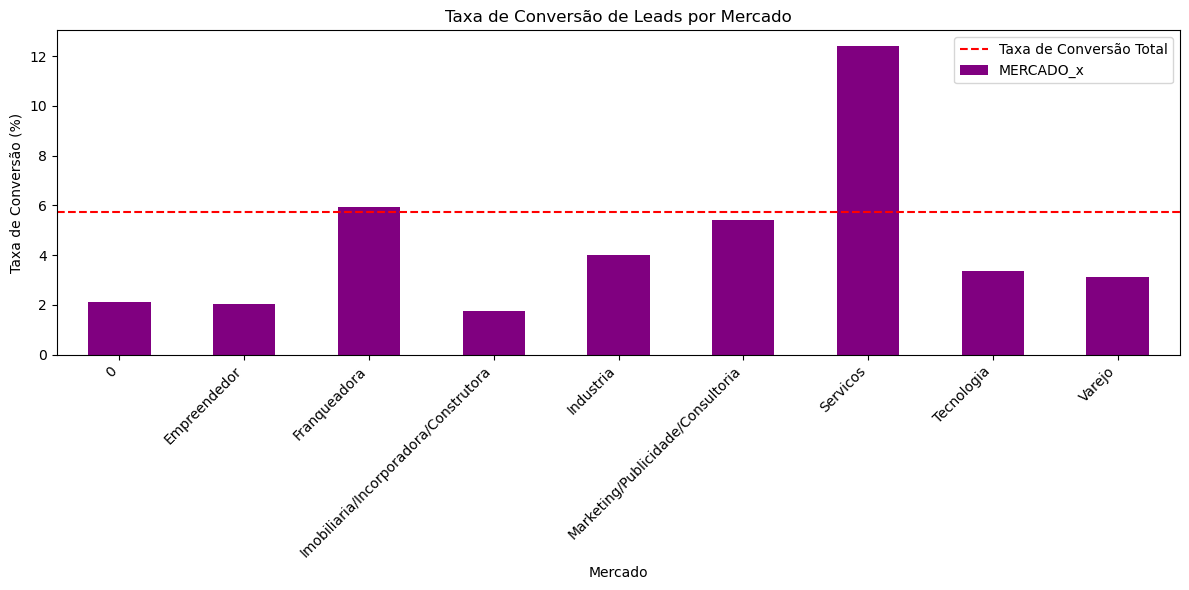

In [21]:
# Contar o número total de leads para cada valor único da coluna 'MERCADO_x'
contagem_total_leads_por_mercado = df['MERCADO_x'].value_counts()

# Filtrar o DataFrame para incluir apenas os leads convertidos
leads_convertidos_df = df[df['VENDIDO'] == 'SIM']

# Contar o número de leads convertidos para cada valor único da coluna 'MERCADO_x'
contagem_leads_convertidos_por_mercado = leads_convertidos_df['MERCADO_x'].value_counts()

# Calcular a taxa de conversão de leads por mercado
taxa_conversao_por_mercado = (contagem_leads_convertidos_por_mercado / contagem_total_leads_por_mercado) * 100

# Criar o gráfico de barras com a taxa de conversão de leads por mercado
plt.figure(figsize=(12, 6))
taxa_conversao_por_mercado.plot(kind='bar', color='purple')
plt.axhline(y=(len(leads_convertidos_df) / len(df)) * 100, color='red', linestyle='--', label='Taxa de Conversão Total')
plt.title('Taxa de Conversão de Leads por Mercado')
plt.xlabel('Mercado')
plt.ylabel('Taxa de Conversão (%)')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()


### Análise por Porte

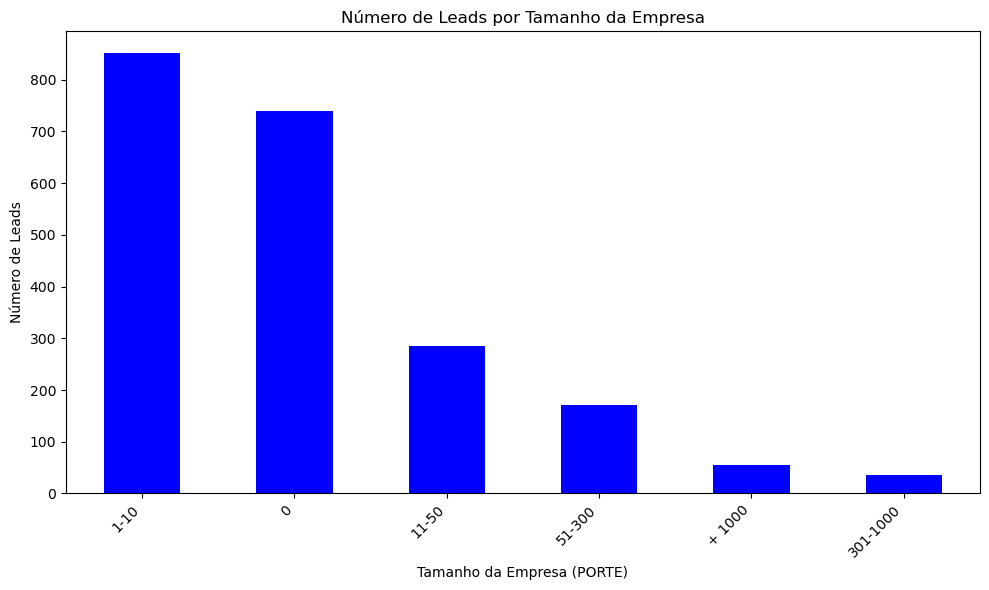

In [22]:
# Contar o número de leads para cada valor único da coluna 'PORTE'
contagem_leads_por_porte = df['PORTE'].value_counts()

# Criar o gráfico de barras com o número de leads para cada valor único da coluna 'PORTE'
plt.figure(figsize=(10, 6))
contagem_leads_por_porte.plot(kind='bar', color='blue')
plt.title('Número de Leads por Tamanho da Empresa')
plt.xlabel('Tamanho da Empresa (PORTE)')
plt.ylabel('Número de Leads')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


## Qual porte possui a maior taxa de conversão?

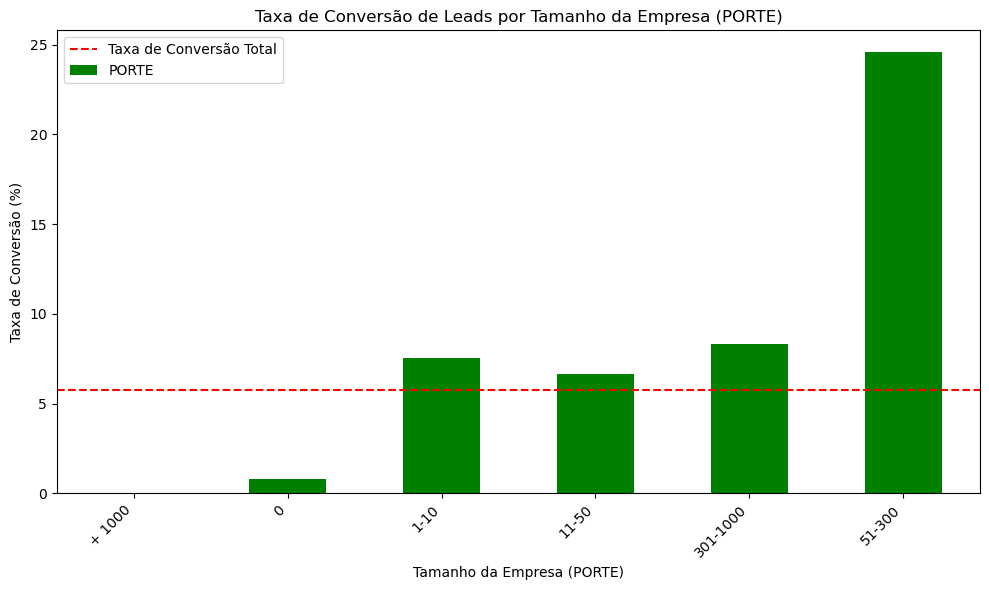

In [23]:
# Contar o número total de leads para cada valor único da coluna 'PORTE'
contagem_total_leads_por_porte = df['PORTE'].value_counts()

# Filtrar o DataFrame para incluir apenas os leads convertidos
leads_convertidos_df = df[df['VENDIDO'] == 'SIM']

# Contar o número de leads convertidos para cada valor único da coluna 'PORTE'
contagem_leads_convertidos_por_porte = leads_convertidos_df['PORTE'].value_counts()

# Calcular a taxa de conversão de leads por tamanho da empresa (PORTE)
taxa_conversao_por_porte = (contagem_leads_convertidos_por_porte / contagem_total_leads_por_porte) * 100

# Criar o gráfico de barras com a taxa de conversão de leads por tamanho da empresa (PORTE)
plt.figure(figsize=(10, 6))
taxa_conversao_por_porte.plot(kind='bar', color='green')
plt.axhline(y=(len(leads_convertidos_df) / len(df)) * 100, color='red', linestyle='--', label='Taxa de Conversão Total')
plt.title('Taxa de Conversão de Leads por Tamanho da Empresa (PORTE)')
plt.xlabel('Tamanho da Empresa (PORTE)')
plt.ylabel('Taxa de Conversão (%)')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()


### Fato interessante

Constatamos que as maiores taxas de conversão ocorrem em um intervalo no qual não está concentrado o maior número de Leads (51-300). Diante disso, uma recomendação interessante é realizar uma pesquisa de mercado para entrar em contato com mais leads dentro dessa faixa de porte. Dessa forma, poderemos explorar melhor esse segmento e potencialmente aumentar a taxa de conversão de leads em futuras campanhas e investimentos.

## Análise dos estados com grandes taxas de conversão.

Abaixo seguem análises de 3 estados em particular.

- O Espírito Santo possui a maior taxa de conversão.

- O estado de Minas possui a segunda maior taxa de conversão e o maior número absoluto de leads coletivos.

- O estado de São Paulo é o segundo maior em termos de leads convertidos.Além disso, o coração econômico do país pode nos revelar muitas informações sobre o perfil médio dos leads.

### Análise Espírito Santo



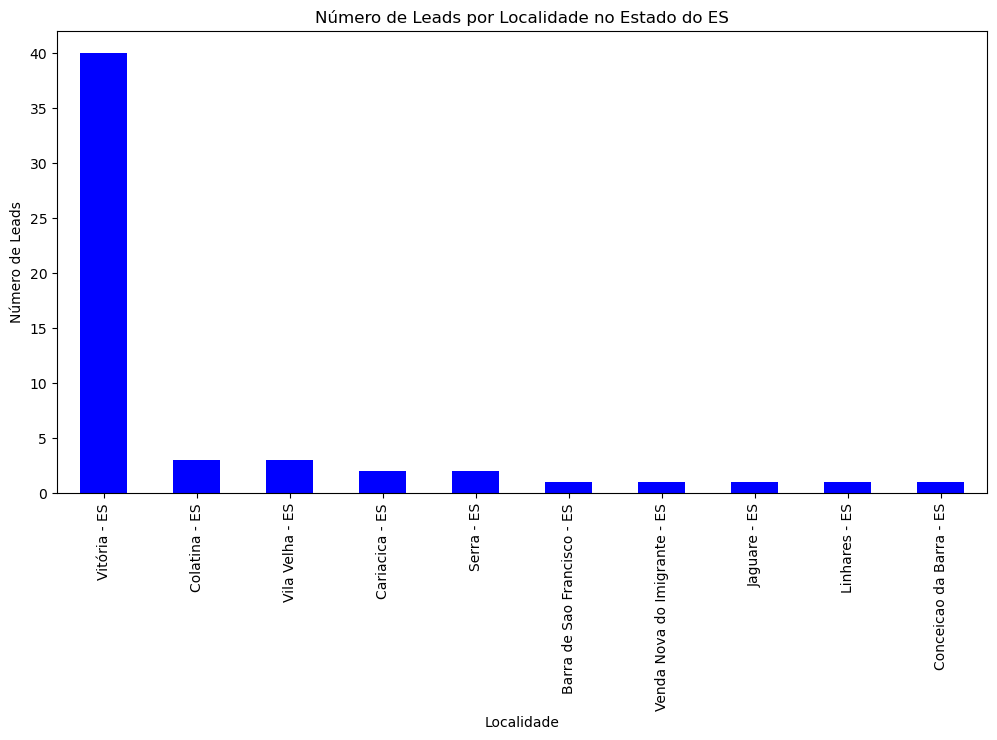

In [24]:
# Filtrar o DataFrame para incluir apenas os leads do estado 'ES'
leads_es_df = df[df['ESTADO'] == 'ES']

# Contar o número de leads para cada localidade do estado 'ES'
contagem_leads_por_local = leads_es_df['LOCAL'].value_counts()

# Criar o gráfico de barras com o número de leads para cada localidade do estado 'ES'
plt.figure(figsize=(12, 6))
contagem_leads_por_local.plot(kind='bar', color='blue')
plt.title('Número de Leads por Localidade no Estado do ES')
plt.xlabel('Localidade')
plt.ylabel('Número de Leads')
plt.xticks(rotation=90)
plt.show()

In [25]:
# Filtrar o DataFrame para incluir apenas os leads de Vitória no estado 'ES'
leads_vitoria_es_df = df[df['LOCAL'] == 'Vitória - ES']

# Contar o número total de leads no estado 'ES'
total_leads_es = len(df[df['ESTADO'] == 'ES'])

# Contar o número total de leads de Vitória no estado 'ES'
total_leads_vitoria_es = len(leads_vitoria_es_df)

# Contar o número de leads convertidos de Vitória no estado 'ES' (com 'VENDIDO' = 'SIM')
leads_convertidos_vitoria_es_df = leads_vitoria_es_df[leads_vitoria_es_df['VENDIDO'] == 'SIM']
total_leads_convertidos_vitoria_es = len(leads_convertidos_vitoria_es_df)

# Calcular a taxa de conversão
taxa_conversao_vitoria_es = (total_leads_convertidos_vitoria_es / total_leads_vitoria_es) * 100

# Exibir o número total de leads no estado 'ES'
print("Número total de Leads no estado 'ES':", total_leads_es)

# Exibir o número total de leads em Vitória - ES
print("Número total de Leads em Vitória - ES:", total_leads_vitoria_es)

# Exibir o número de leads convertidos em Vitória - ES
print("Número de Leads convertidos em Vitória - ES:", total_leads_convertidos_vitoria_es)

# Exibir a taxa de conversão para leads de Vitória - ES
print("Taxa de conversão para leads de Vitória - ES: {:.2f}%".format(taxa_conversao_vitoria_es))


Número total de Leads no estado 'ES': 55
Número total de Leads em Vitória - ES: 40
Número de Leads convertidos em Vitória - ES: 32
Taxa de conversão para leads de Vitória - ES: 80.00%


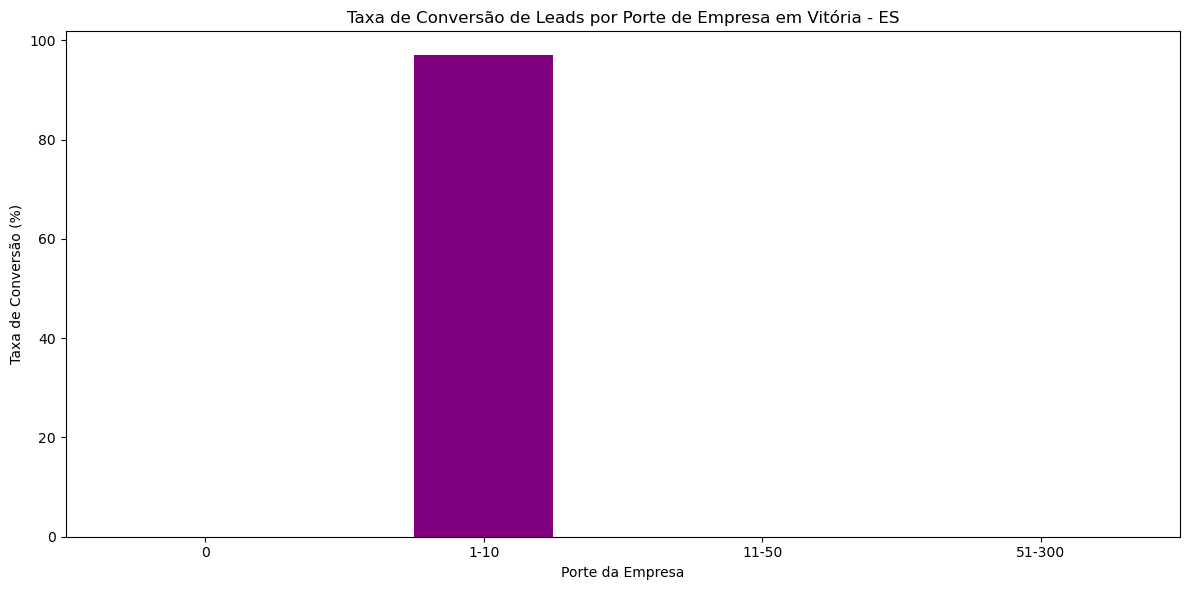

In [26]:
# Filtrar o DataFrame para incluir apenas os dados do local Vitória - ES
leads_vitoria_es_df = df[df['LOCAL'] == 'Vitória - ES']

# Contar o número total de leads por porte de empresa em Vitória - ES
contagem_total_leads_por_porte_vitoria_es = leads_vitoria_es_df['PORTE'].value_counts()

# Filtrar o DataFrame para incluir apenas os leads convertidos em Vitória - ES
leads_convertidos_vitoria_es_df = leads_vitoria_es_df[leads_vitoria_es_df['VENDIDO'] == 'SIM']

# Contar o número de leads convertidos por porte de empresa em Vitória - ES
contagem_leads_convertidos_por_porte_vitoria_es = leads_convertidos_vitoria_es_df['PORTE'].value_counts()

# Calcular a taxa de conversão de leads para cada porte de empresa em Vitória - ES
taxa_conversao_por_porte_vitoria_es = (contagem_leads_convertidos_por_porte_vitoria_es / contagem_total_leads_por_porte_vitoria_es) * 100

# Criar o gráfico de barras com a taxa de conversão por porte de empresa em Vitória - ES
plt.figure(figsize=(12, 6))
taxa_conversao_por_porte_vitoria_es.plot(kind='bar', color='purple')
plt.title('Taxa de Conversão de Leads por Porte de Empresa em Vitória - ES')
plt.xlabel('Porte da Empresa')
plt.ylabel('Taxa de Conversão (%)')
plt.xticks(rotation=0, ha='center')
plt.tight_layout()
plt.show()

O gráfico acima indica que os leads convertidos em Vitória-ES provavelmente são startups.

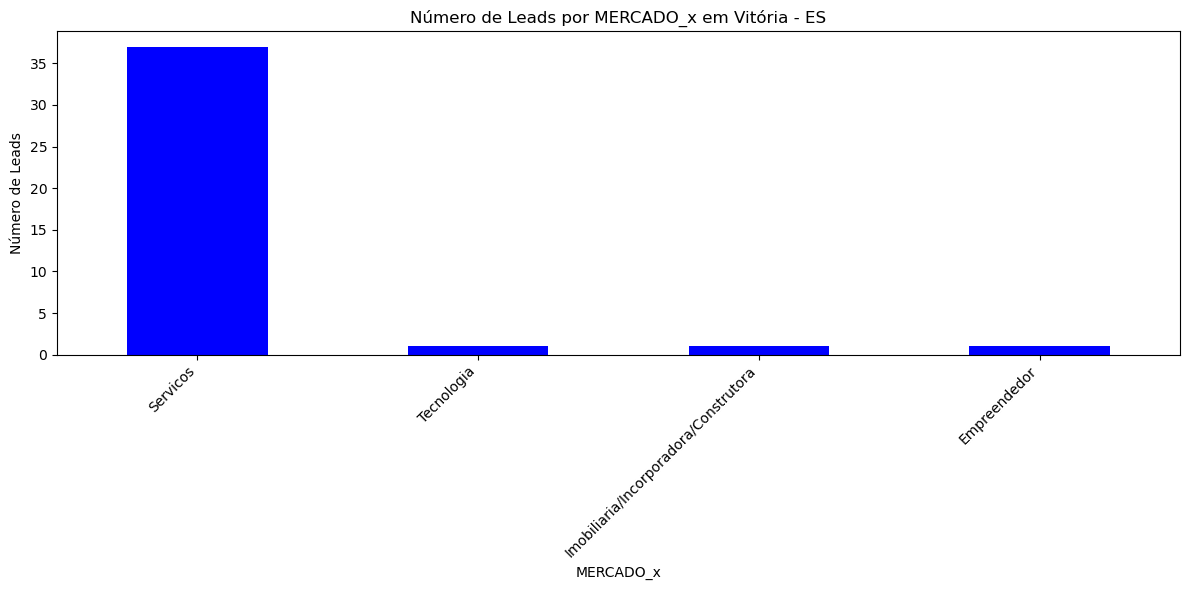

In [27]:
# Filtrar o DataFrame para incluir apenas os leads de Vitória no estado 'ES'
leads_vitoria_es_df = df[df['LOCAL'] == 'Vitória - ES']

# Contar o número de leads para cada valor único da coluna 'MERCADO_x' em Vitória-ES
contagem_leads_por_mercado_vitoria_es = leads_vitoria_es_df['MERCADO_x'].value_counts()

# Criar o gráfico de barras com o número de leads para cada valor único da coluna 'MERCADO_x' em Vitória-ES
plt.figure(figsize=(12, 6))
contagem_leads_por_mercado_vitoria_es.plot(kind='bar', color='blue')
plt.title('Número de Leads por MERCADO_x em Vitória - ES')
plt.xlabel('MERCADO_x')
plt.ylabel('Número de Leads')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


O setor de serviços se mostra como dominante no estado.

In [28]:
# Filtrar o DataFrame para incluir apenas os leads de Vitória no estado 'ES' com mercado igual a 'Servicos'
leads_servicos_vitoria_es_df = df[(df['LOCAL'] == 'Vitória - ES') & (df['MERCADO_x'] == 'Servicos')]

# Contar o número total de leads de Vitória no estado 'ES' com mercado igual a 'Servicos'
total_leads_vitoria_es_servicos = len(leads_servicos_vitoria_es_df)

# Contar o número de leads convertidos de Vitória no estado 'ES' com mercado igual a 'Servicos' (com 'VENDIDO' = 'SIM')
leads_convertidos_vitoria_es_servicos_df = leads_servicos_vitoria_es_df[leads_servicos_vitoria_es_df['VENDIDO'] == 'SIM']
total_leads_convertidos_vitoria_es_servicos = len(leads_convertidos_vitoria_es_servicos_df)

# Calcular a taxa de conversão
taxa_conversao_vitoria_es_servicos = (total_leads_convertidos_vitoria_es_servicos / total_leads_vitoria_es_servicos) * 100

# Exibir o número total de leads em Vitória - ES com mercado igual a 'Servicos'
print("Número total de Leads em Vitória - ES com mercado 'Servicos':", total_leads_vitoria_es_servicos)

# Exibir o número de leads convertidos em Vitória - ES com mercado igual a 'Servicos'
print("Número de Leads convertidos em Vitória - ES com mercado 'Servicos':", total_leads_convertidos_vitoria_es_servicos)

# Exibir a taxa de conversão para leads em Vitória - ES com mercado igual a 'Servicos'
print("Taxa de conversão para leads em Vitória - ES com mercado 'Servicos': {:.2f}%".format(taxa_conversao_vitoria_es_servicos))


Número total de Leads em Vitória - ES com mercado 'Servicos': 37
Número de Leads convertidos em Vitória - ES com mercado 'Servicos': 32
Taxa de conversão para leads em Vitória - ES com mercado 'Servicos': 86.49%


### Análise Minas Gerais

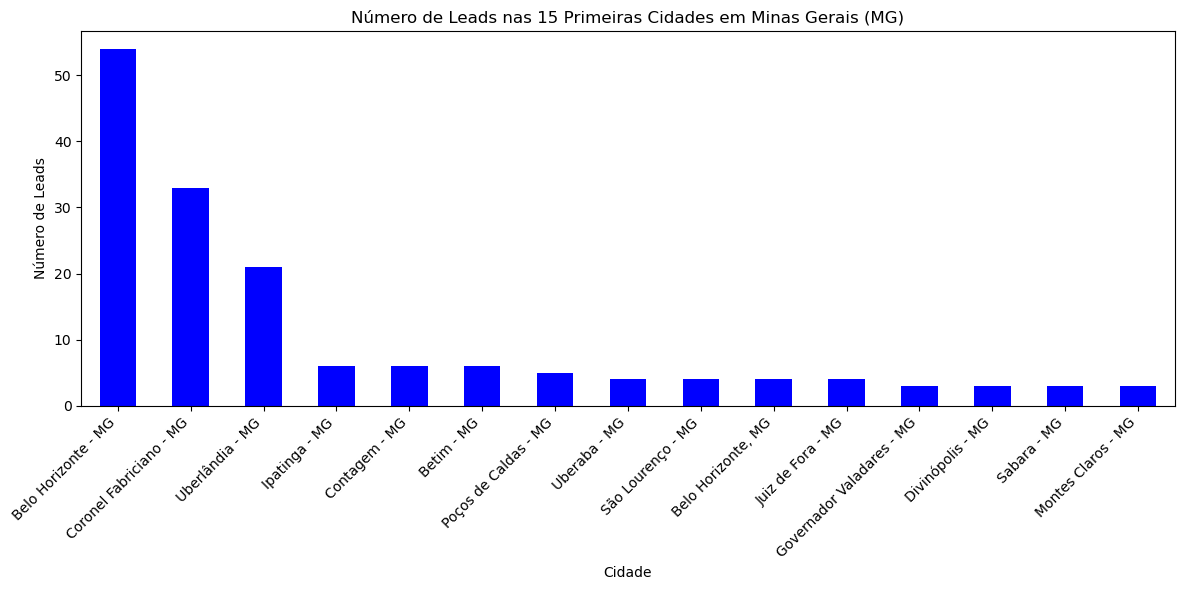

In [29]:

# Filtrar o DataFrame para incluir apenas os leads do estado de Minas Gerais ('MG')
leads_mg_df = df[df['ESTADO'] == 'MG']
# Contar o número de leads para cada valor único da coluna 'LOCAL' em Minas Gerais
contagem_leads_por_local_mg = leads_mg_df['LOCAL'].value_counts()

# Selecionar apenas as 15 primeiras cidades com maior número de leads em MG
top_15_cidades_leads_mg = contagem_leads_por_local_mg.head(15)

# Criar o gráfico de barras com o número de leads para as 15 primeiras cidades em MG
plt.figure(figsize=(12, 6))
top_15_cidades_leads_mg.plot(kind='bar', color='blue')
plt.title('Número de Leads nas 15 Primeiras Cidades em Minas Gerais (MG)')
plt.xlabel('Cidade')
plt.ylabel('Número de Leads')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


### Abaixo temos um caso curioso

Uma taxa bem considerável no município de Coronel Fabriciano -MG

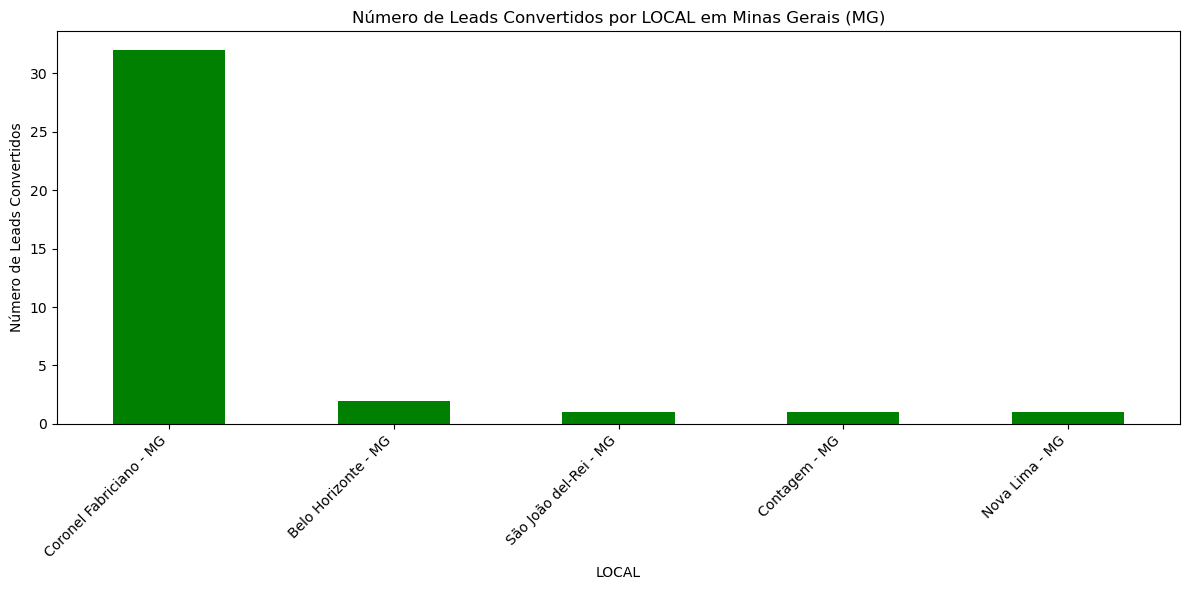

In [30]:
# Filtrar o DataFrame para incluir apenas os leads convertidos do estado de Minas Gerais ('MG')
leads_convertidos_mg_df = df[(df['ESTADO'] == 'MG') & (df['VENDIDO'] == 'SIM')]

# Contar o número de leads convertidos para cada valor único da coluna 'LOCAL' em Minas Gerais
contagem_leads_convertidos_por_local_mg = leads_convertidos_mg_df['LOCAL'].value_counts()

# Criar o gráfico de barras com o número de leads convertidos para cada valor único da coluna 'LOCAL' em Minas Gerais
plt.figure(figsize=(12, 6))
contagem_leads_convertidos_por_local_mg.plot(kind='bar', color='green')
plt.title('Número de Leads Convertidos por LOCAL em Minas Gerais (MG)')
plt.xlabel('LOCAL')
plt.ylabel('Número de Leads Convertidos')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [31]:
# Filtrar o DataFrame para incluir apenas os leads de Coronel Fabriciano - MG
leads_coronel_fabriciano_mg_df = df[(df['LOCAL'] == 'Coronel Fabriciano - MG') & (df['ESTADO'] == 'MG')]

# Filtrar o DataFrame para incluir apenas os leads convertidos do estado de Minas Gerais ('MG')
leads_convertidos_mg_df = df[(df['ESTADO'] == 'MG') & (df['VENDIDO'] == 'SIM')]

# Total de leads de Coronel Fabriciano - MG
total_leads_coronel_fabriciano_mg = len(leads_coronel_fabriciano_mg_df)

# Total de leads convertidos de Coronel Fabriciano - MG
total_leads_convertidos_coronel_fabriciano_mg = len(leads_coronel_fabriciano_mg_df[leads_coronel_fabriciano_mg_df['VENDIDO'] == 'SIM'])

# Total de leads do estado de Minas Gerais (MG)
total_leads_mg = len(df[df['ESTADO'] == 'MG'])

# Total de leads convertidos do estado de Minas Gerais (MG)
total_leads_convertidos_mg = len(leads_convertidos_mg_df)

# Taxa de conversão para Coronel Fabriciano - MG
taxa_conversao_coronel_fabriciano_mg = (total_leads_convertidos_coronel_fabriciano_mg / total_leads_coronel_fabriciano_mg) * 100

# Taxa de conversão para o estado de Minas Gerais (MG)
taxa_conversao_mg = (total_leads_convertidos_mg / total_leads_mg) * 100

print(f"Taxa de Conversão para Coronel Fabriciano - MG: {taxa_conversao_coronel_fabriciano_mg:.2f}%")
print(f"Taxa de Conversão para o Estado de Minas Gerais (MG): {taxa_conversao_mg:.2f}%")


Taxa de Conversão para Coronel Fabriciano - MG: 96.97%
Taxa de Conversão para o Estado de Minas Gerais (MG): 16.74%


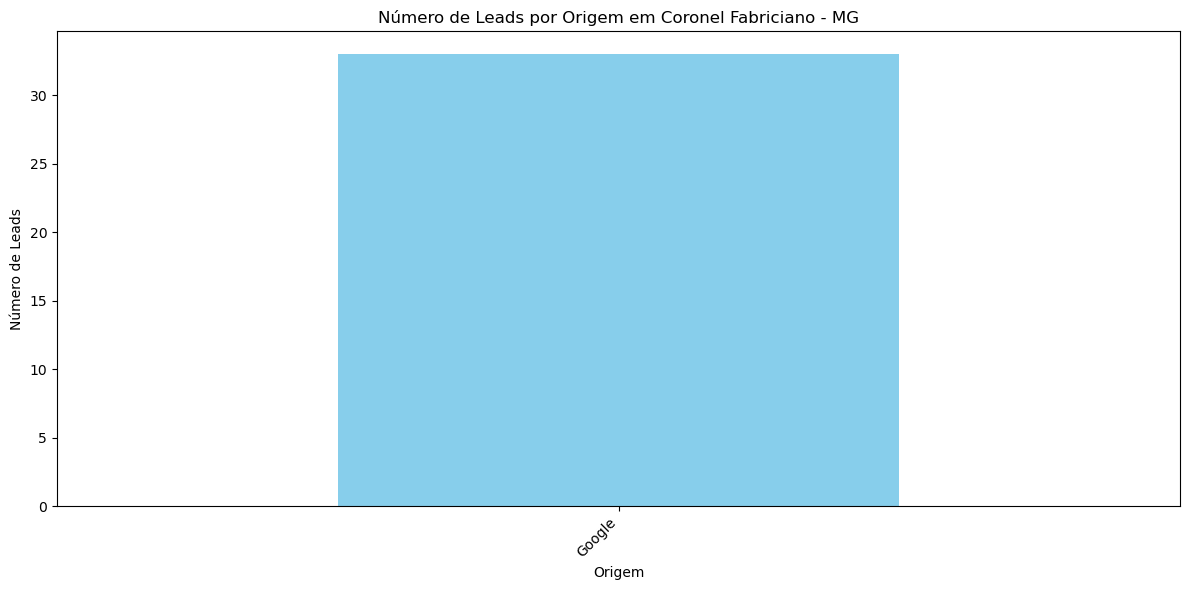

In [32]:
# Filtrar o DataFrame para incluir apenas os dados do local "Coronel Fabriciano - MG"
coronel_fabriciano_df = df[df['LOCAL'] == 'Coronel Fabriciano - MG']

# Contar o número de leads por Origem no local "Coronel Fabriciano - MG"
contagem_leads_por_origem = coronel_fabriciano_df['ORIGEM'].value_counts()

# Criar o barplot
plt.figure(figsize=(12, 6))
contagem_leads_por_origem.plot(kind='bar', color='skyblue')

# Definir título e rótulos dos eixos
plt.title('Número de Leads por Origem em Coronel Fabriciano - MG')
plt.xlabel('Origem')
plt.ylabel('Número de Leads')

# Girar os rótulos das origens na vertical
plt.xticks(rotation=45, ha='right')

# Exibir o barplot
plt.tight_layout()
plt.show()


O gráfico acima mostra que o  google - cpc se mostrou uma forma efetiva de contato nesta região.

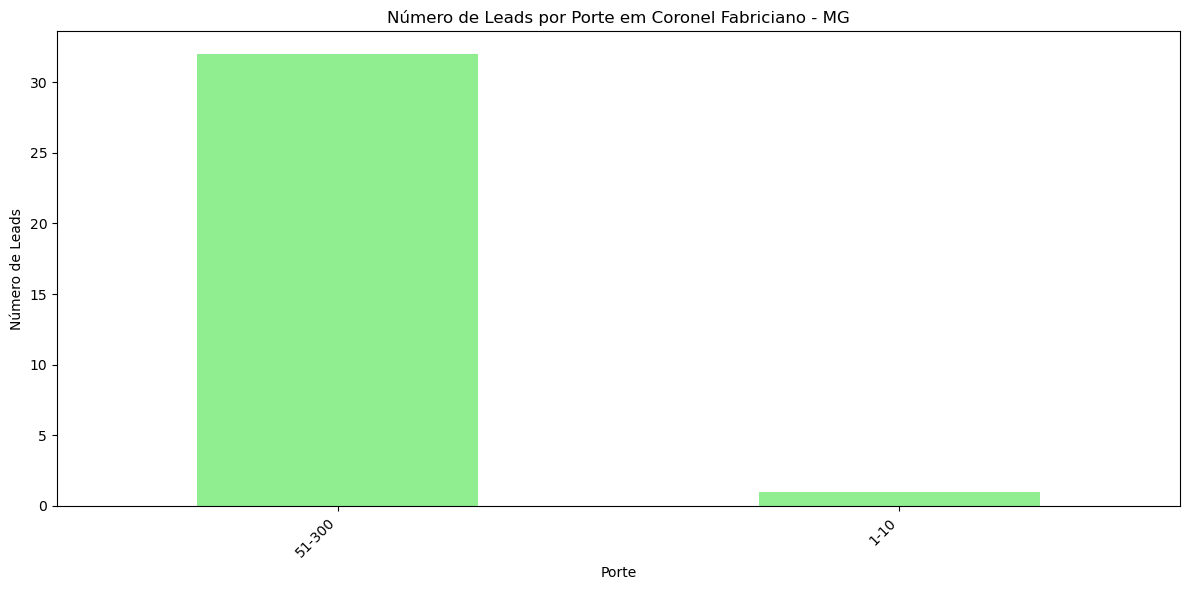

In [33]:
# Filtrar o DataFrame para incluir apenas os dados do local "Coronel Fabriciano - MG"
coronel_fabriciano_df = df[df['LOCAL'] == 'Coronel Fabriciano - MG']

# Contar o número de leads por Porte no local "Coronel Fabriciano - MG"
contagem_leads_por_porte = coronel_fabriciano_df['PORTE'].value_counts()

# Criar o barplot
plt.figure(figsize=(12, 6))
contagem_leads_por_porte.plot(kind='bar', color='lightgreen')

# Definir título e rótulos dos eixos
plt.title('Número de Leads por Porte em Coronel Fabriciano - MG')
plt.xlabel('Porte')
plt.ylabel('Número de Leads')

# Girar os rótulos dos portes na vertical
plt.xticks(rotation=45, ha='right')

# Exibir o barplot
plt.tight_layout()
plt.show()


O porte dominante é 51-300, justamente a faixa que consideramos como interessante para futuras campanhas e investimentos.

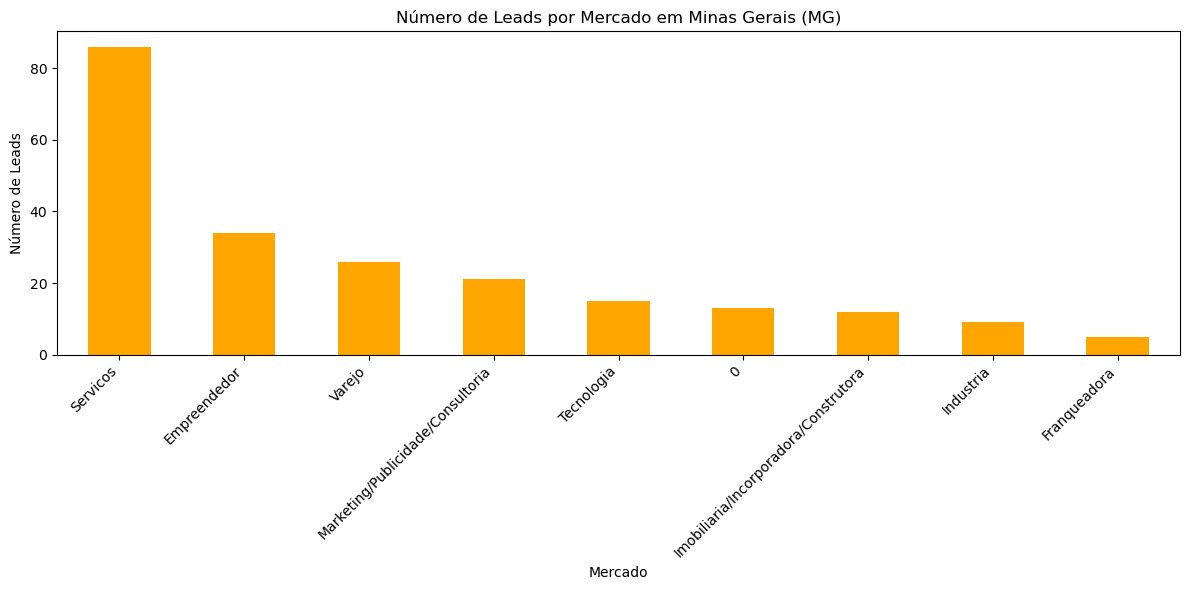

In [34]:
# Filtrar o DataFrame para incluir apenas os leads do estado de Minas Gerais ('MG')
leads_mg_df = df[df['ESTADO'] == 'MG']

# Contar o número de leads para cada valor único da coluna 'MERCADO_x' em Minas Gerais
contagem_leads_por_mercado_mg = leads_mg_df['MERCADO_x'].value_counts()

# Criar o gráfico de barras com o número de leads para cada valor único da coluna 'MERCADO_x' em Minas Gerais
plt.figure(figsize=(12, 6))
contagem_leads_por_mercado_mg.plot(kind='bar', color='orange')
plt.title('Número de Leads por Mercado em Minas Gerais (MG)')
plt.xlabel('Mercado')
plt.ylabel('Número de Leads')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

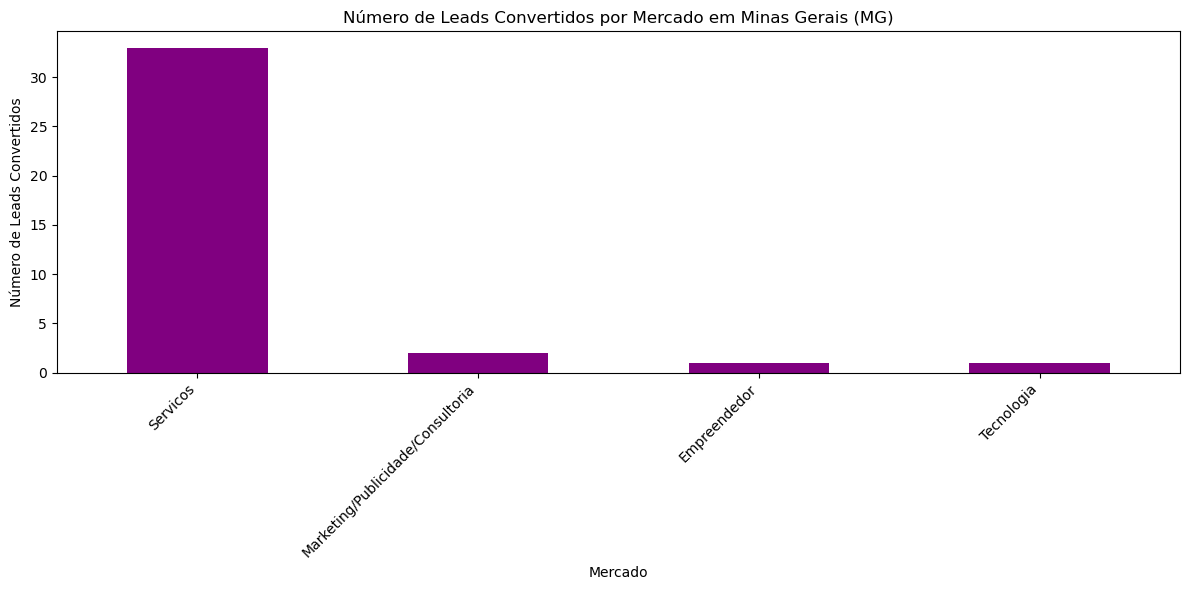

In [35]:
# Filtrar o DataFrame para incluir apenas os leads convertidos do estado de Minas Gerais ('MG')
leads_convertidos_mg_df = df[(df['ESTADO'] == 'MG') & (df['VENDIDO'] == 'SIM')]

# Contar o número de leads convertidos para cada valor único da coluna 'MERCADO_x' em Minas Gerais
contagem_leads_convertidos_por_mercado_mg = leads_convertidos_mg_df['MERCADO_x'].value_counts()

# Criar o gráfico de barras com o número de leads convertidos para cada valor único da coluna 'MERCADO_x' em Minas Gerais
plt.figure(figsize=(12, 6))
contagem_leads_convertidos_por_mercado_mg.plot(kind='bar', color='purple')
plt.title('Número de Leads Convertidos por Mercado em Minas Gerais (MG)')
plt.xlabel('Mercado')
plt.ylabel('Número de Leads Convertidos')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Novamente observamos uma dominância da área de serviços.

### Análise São Paulo

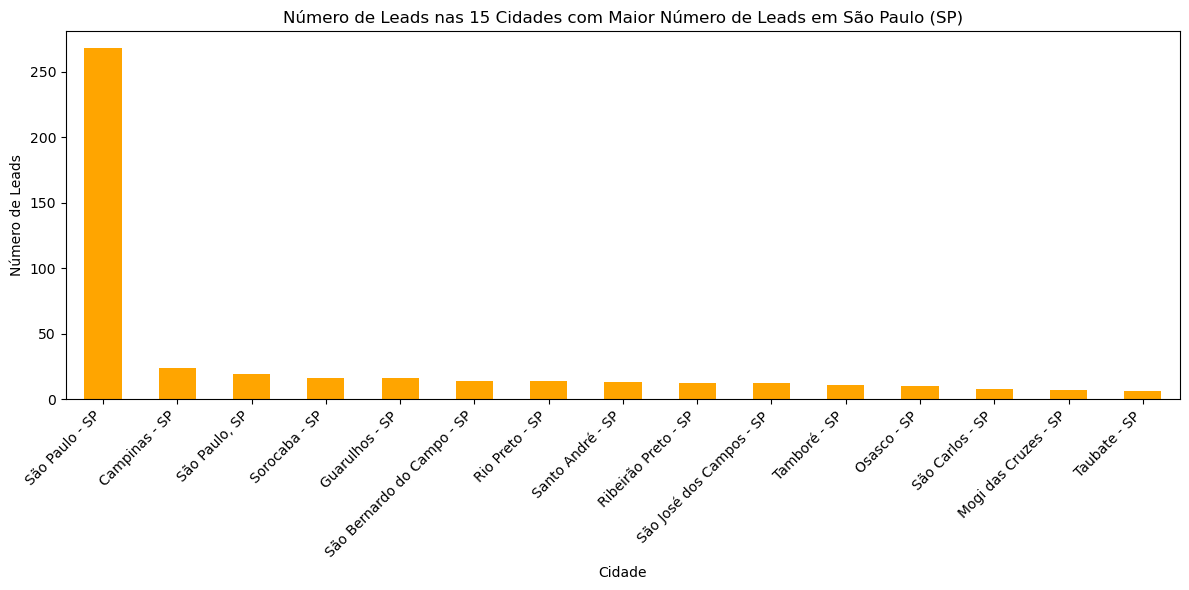

In [36]:
# Filtrar o DataFrame para incluir apenas os dados do estado de SP
leads_sp_df = df[df['ESTADO'] == 'SP']

# Contar o número de leads para cada valor único da coluna 'LOCAL' em SP
contagem_leads_por_local_sp = leads_sp_df['LOCAL'].value_counts()

# Selecionar apenas as 15 cidades com maior número de leads
top_15_cidades_leads_sp = contagem_leads_por_local_sp.head(15)

# Criar o gráfico de barras com o número de leads para as 15 cidades com maior número de leads em SP
plt.figure(figsize=(12, 6))
top_15_cidades_leads_sp.plot(kind='bar', color='orange')
plt.title('Número de Leads nas 15 Cidades com Maior Número de Leads em São Paulo (SP)')
plt.xlabel('Cidade')
plt.ylabel('Número de Leads')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


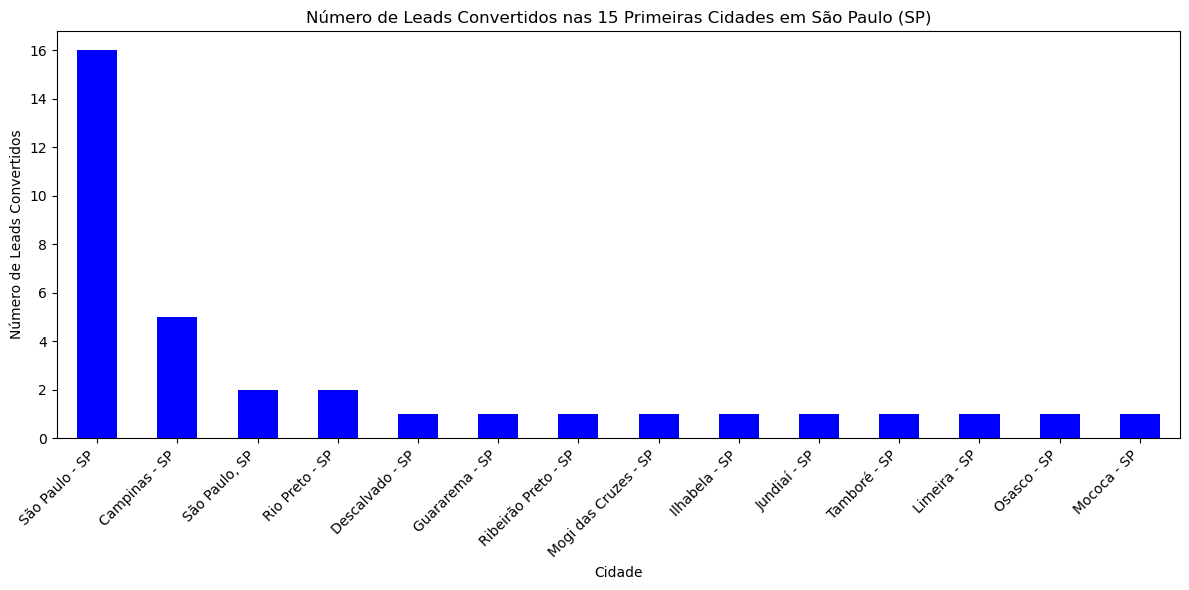

In [37]:
# Filtrar o DataFrame para incluir apenas os dados do estado de SP
leads_sp_df = df[df['ESTADO'] == 'SP']

# Filtrar o DataFrame para incluir apenas os leads convertidos em SP
leads_convertidos_sp_df = leads_sp_df[leads_sp_df['VENDIDO'] == 'SIM']

# Contar o número de leads convertidos para cada cidade em SP
contagem_leads_convertidos_por_local_sp = leads_convertidos_sp_df['LOCAL'].value_counts()

# Ordenar a contagem de leads convertidos em ordem decrescente
contagem_leads_convertidos_por_local_sp = contagem_leads_convertidos_por_local_sp.sort_values(ascending=False)

# Selecionar apenas as 15 primeiras cidades com maior número de leads convertidos em SP
top_15_cidades_leads_convertidos_sp = contagem_leads_convertidos_por_local_sp.head(15)

# Criar o gráfico de barras com o número de leads convertidos para as 15 primeiras cidades em SP
plt.figure(figsize=(12, 6))
top_15_cidades_leads_convertidos_sp.plot(kind='bar', color='blue')
plt.title('Número de Leads Convertidos nas 15 Primeiras Cidades em São Paulo (SP)')
plt.xlabel('Cidade')
plt.ylabel('Número de Leads Convertidos')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


### Mercado em SP

Abaixo podemos observar um fenômeno interessante.Em São Paulo, o mercado com maior taxa de conversão é o de Franqueadoras

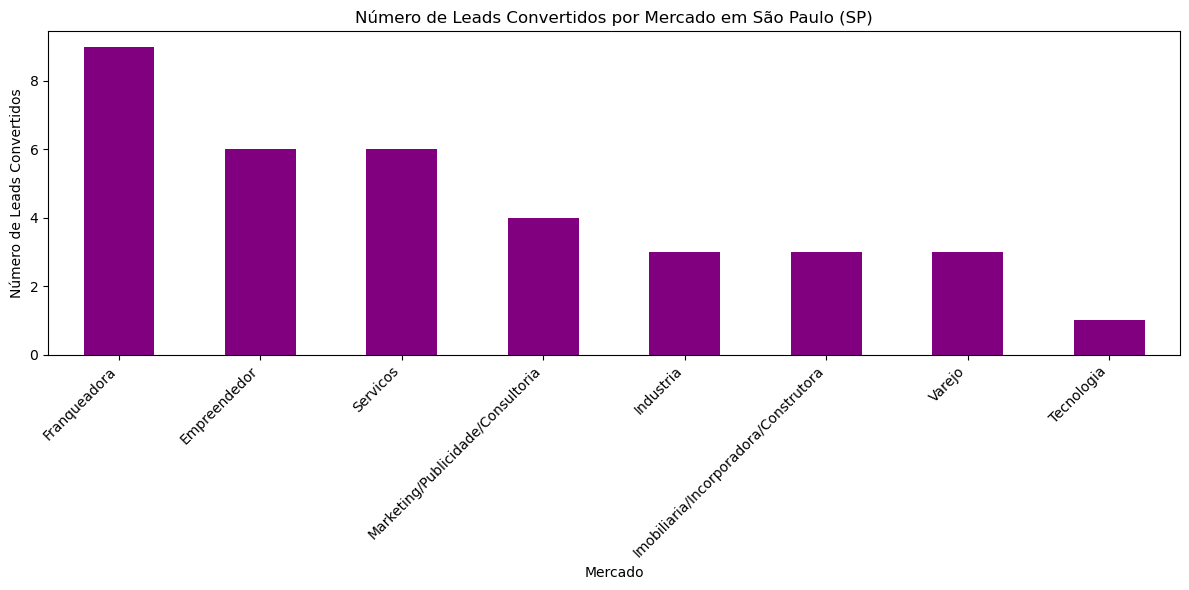

In [38]:
# Filtrar o DataFrame para incluir apenas os dados do estado de SP
leads_sp_df = df[df['ESTADO'] == 'SP']

# Filtrar o DataFrame para incluir apenas os leads convertidos em SP
leads_convertidos_sp_df = leads_sp_df[leads_sp_df['VENDIDO'] == 'SIM']

# Contar o número de leads convertidos para cada mercado em SP
contagem_leads_convertidos_por_mercado_sp = leads_convertidos_sp_df['MERCADO_x'].value_counts()

# Ordenar a contagem de leads convertidos em ordem decrescente
contagem_leads_convertidos_por_mercado_sp = contagem_leads_convertidos_por_mercado_sp.sort_values(ascending=False)

# Criar o gráfico de barras com o número de leads convertidos por mercado em SP
plt.figure(figsize=(12, 6))
contagem_leads_convertidos_por_mercado_sp.plot(kind='bar', color='purple')
plt.title('Número de Leads Convertidos por Mercado em São Paulo (SP)')
plt.xlabel('Mercado')
plt.ylabel('Número de Leads Convertidos')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [39]:
# Filtrar o DataFrame para incluir apenas os dados do estado de SP
leads_sp_df = df[df['ESTADO'] == 'SP']

# Contar o número total de leads por mercado em SP
contagem_total_leads_por_mercado_sp = leads_sp_df['MERCADO_x'].value_counts()

# Filtrar o DataFrame para incluir apenas os leads convertidos em SP
leads_convertidos_sp_df = leads_sp_df[leads_sp_df['VENDIDO'] == 'SIM']

# Contar o número de leads convertidos por mercado em SP
contagem_leads_convertidos_por_mercado_sp = leads_convertidos_sp_df['MERCADO_x'].value_counts()

# Calcular a taxa de conversão de leads para cada mercado em SP
taxa_conversao_por_mercado_sp = (contagem_leads_convertidos_por_mercado_sp / contagem_total_leads_por_mercado_sp) * 100

# Criar a tabela com a taxa de conversão por mercado em SP
tabela_taxa_conversao_sp = pd.DataFrame({
    'Mercado': taxa_conversao_por_mercado_sp.index,
    'Taxa de Conversão (%)': taxa_conversao_por_mercado_sp.values
})

# Ordenar a tabela em ordem decrescente pela taxa de conversão
tabela_taxa_conversao_sp = tabela_taxa_conversao_sp.sort_values(by='Taxa de Conversão (%)', ascending=False)

# Exibir a tabela
print(tabela_taxa_conversao_sp)


                                 Mercado  Taxa de Conversão (%)
2                           Franqueadora              19.148936
5      Marketing/Publicidade/Consultoria               8.695652
4                              Industria               7.692308
6                               Servicos               4.580153
1                           Empreendedor               4.511278
3  Imobiliaria/Incorporadora/Construtora               4.411765
8                                 Varejo               4.347826
7                             Tecnologia               2.564103
0                                      0                    NaN


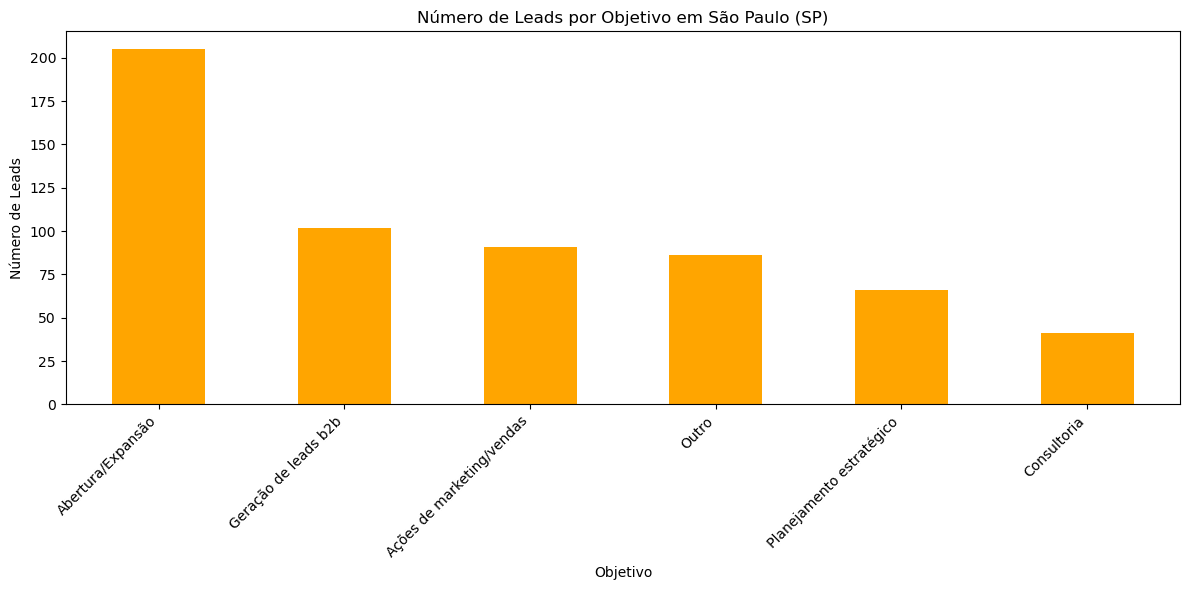

In [40]:
# Filtrar o DataFrame para incluir apenas os dados do estado de SP
leads_sp_df = df[df['ESTADO'] == 'SP']

# Contar o número de leads por objetivo em SP
contagem_leads_por_objetivo_sp = leads_sp_df['OBJETIVO'].value_counts()

# Criar o gráfico de barras com o número de leads por objetivo em SP
plt.figure(figsize=(12, 6))
contagem_leads_por_objetivo_sp.plot(kind='bar', color='orange')
plt.title('Número de Leads por Objetivo em São Paulo (SP)')
plt.xlabel('Objetivo')
plt.ylabel('Número de Leads')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


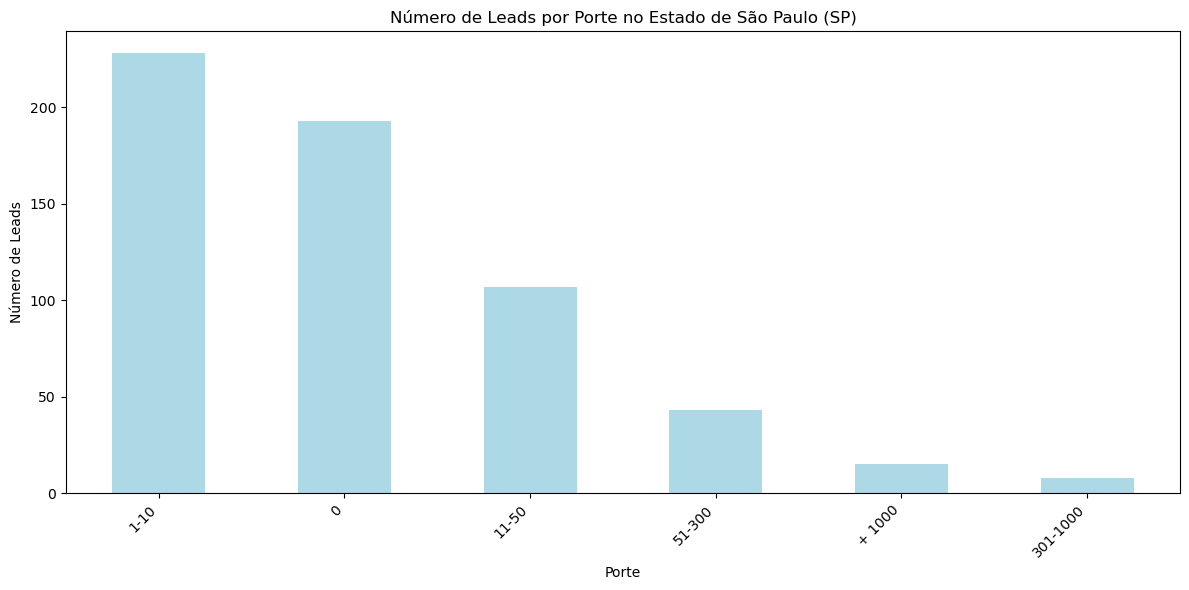

In [41]:
# Filtrar o DataFrame para incluir apenas os dados do estado de São Paulo (SP)
sp_df = df[df['ESTADO'] == 'SP']

# Contar o número de leads por Porte no estado de São Paulo (SP)
contagem_leads_por_porte_sp = sp_df['PORTE'].value_counts()

# Criar o barplot
plt.figure(figsize=(12, 6))
contagem_leads_por_porte_sp.plot(kind='bar', color='lightblue')

# Definir título e rótulos dos eixos
plt.title('Número de Leads por Porte no Estado de São Paulo (SP)')
plt.xlabel('Porte')
plt.ylabel('Número de Leads')

# Girar os rótulos dos portes na vertical
plt.xticks(rotation=45, ha='right')

# Exibir o barplot
plt.tight_layout()
plt.show()


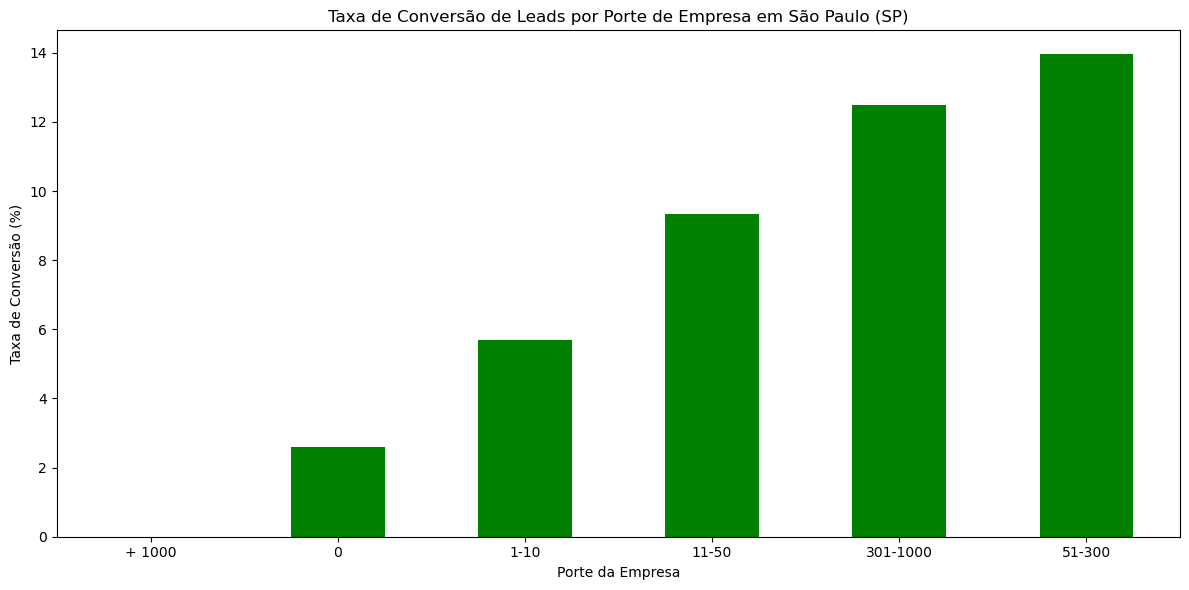

In [42]:
# Filtrar o DataFrame para incluir apenas os dados do estado de SP
leads_sp_df = df[df['ESTADO'] == 'SP']

# Contar o número total de leads por porte de empresa em SP
contagem_total_leads_por_porte_sp = leads_sp_df['PORTE'].value_counts()

# Filtrar o DataFrame para incluir apenas os leads convertidos em SP
leads_convertidos_sp_df = leads_sp_df[leads_sp_df['VENDIDO'] == 'SIM']

# Contar o número de leads convertidos por porte de empresa em SP
contagem_leads_convertidos_por_porte_sp = leads_convertidos_sp_df['PORTE'].value_counts()

# Calcular a taxa de conversão de leads para cada porte de empresa em SP
taxa_conversao_por_porte_sp = (contagem_leads_convertidos_por_porte_sp / contagem_total_leads_por_porte_sp) * 100

# Criar o gráfico de barras com a taxa de conversão por porte de empresa em SP
plt.figure(figsize=(12, 6))
taxa_conversao_por_porte_sp.plot(kind='bar', color='green')
plt.title('Taxa de Conversão de Leads por Porte de Empresa em São Paulo (SP)')
plt.xlabel('Porte da Empresa')
plt.ylabel('Taxa de Conversão (%)')
plt.xticks(rotation=0, ha='center')
plt.tight_layout()
plt.show()


Acima novamente observamos que há taxas maiores de conversão entre as empresas com porte mais considerável (51-300) ou (301-1000).Enquanto isso maior parte dos esforços(Leads totais) estão concentrados em empresas de menor porte.

## Sobre as formas de captação(ORIGEM).

### Qual a forma de captação mais comum??

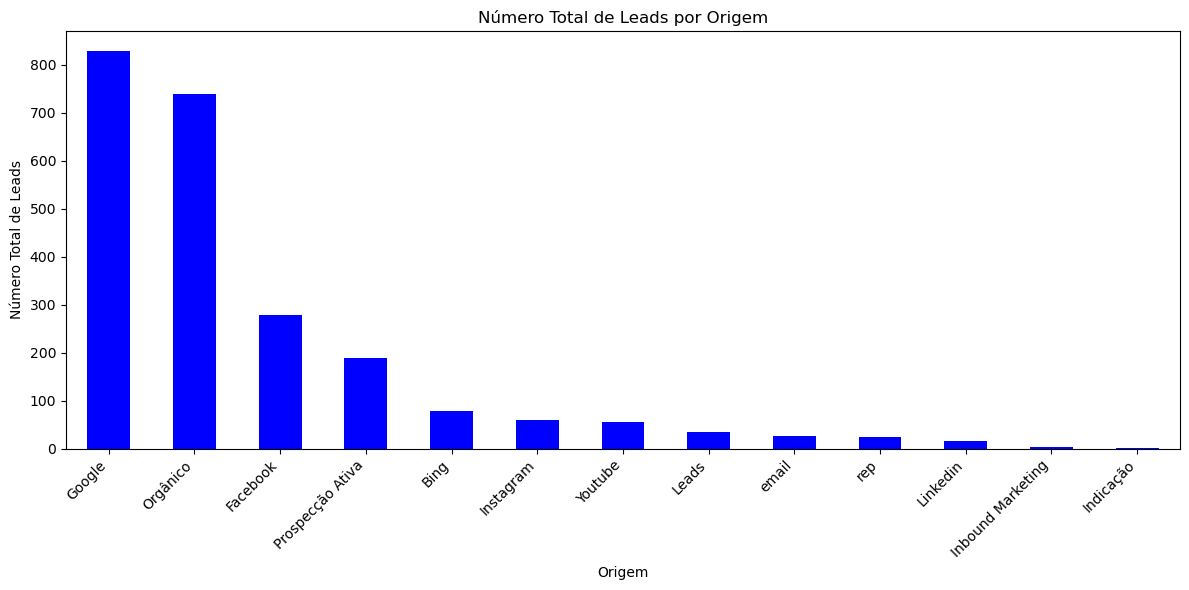

In [43]:
# Contar o número total de leads por origem
contagem_total_leads_por_origem = df['ORIGEM'].value_counts()

# Criar o gráfico de barras com o número total de leads por origem
plt.figure(figsize=(12, 6))
contagem_total_leads_por_origem.plot(kind='bar', color='blue')
plt.title('Número Total de Leads por Origem')
plt.xlabel('Origem')
plt.ylabel('Número Total de Leads')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# Qual forma possui melhores taxas de conversão?

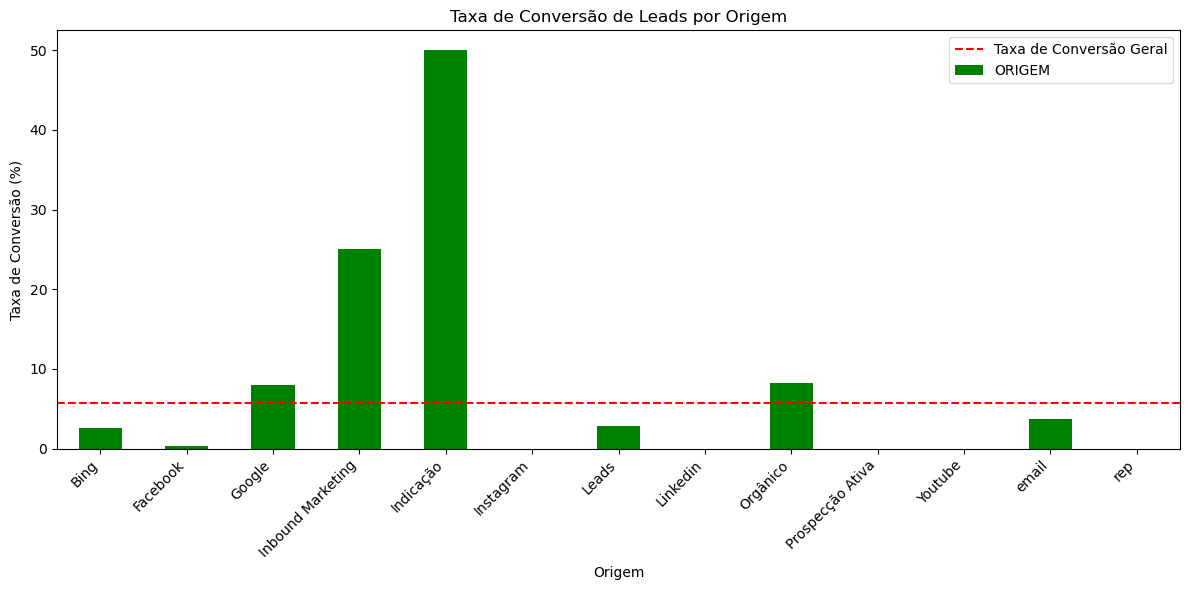

In [44]:
# Contar o número total de leads por origem
contagem_total_leads_por_origem = df['ORIGEM'].value_counts()

# Filtrar o DataFrame para incluir apenas os leads convertidos
leads_convertidos_df = df[df['VENDIDO'] == 'SIM']

# Contar o número de leads convertidos por origem
contagem_leads_convertidos_por_origem = leads_convertidos_df['ORIGEM'].value_counts()

# Calcular a taxa de conversão de leads para cada origem
taxa_conversao_por_origem = (contagem_leads_convertidos_por_origem / contagem_total_leads_por_origem) * 100

# Calcular a taxa de conversão geral (de todos os leads)
taxa_conversao_geral = (leads_convertidos_df.shape[0] / df.shape[0]) * 100

# Criar o gráfico de barras com a taxa de conversão de leads por origem
plt.figure(figsize=(12, 6))
taxa_conversao_por_origem.plot(kind='bar', color='green')
plt.axhline(y=taxa_conversao_geral, color='red', linestyle='--', label='Taxa de Conversão Geral')
plt.title('Taxa de Conversão de Leads por Origem')
plt.xlabel('Origem')
plt.ylabel('Taxa de Conversão (%)')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()


## Validação de Métodos de captação

Esta sessão não foi incluída a tempo para o fim do Desafio,será completa como estudo futuro.O que se planeja fazer é conduzir testes de hipótese que Validem(Rejeitem) se um determinado método de captação é ou não inferior a média geral de conversão de leads.Essa técnica é bastante útil para determinar quais meios merecem mais tempo e esforço do time de Marketing.O gráfico acima dá uma ideia(não validada) da eficiência de cada método.

## Abordagem ML

A seguir, aplicamos um algoritmo Random Forest com rebalanceamento, considerando que estamos lidando com dados desbalanceados. É importante ressaltar que esse algoritmo é apenas um protótipo e pode ser aprimorado de diversas formas, o que será feito em trabalhos futuros.

Uma forma em que ele poderia ser útil para auxiliar o time de Marketing é através da obtenção da probabilidade de um determinado Lead se tornar um cliente convertido (SIM). Essa probabilidade poderia ser incorporada ao sistema de backend de forma que, após o preenchimento do cadastro de um Lead, seus dados seriam utilizados pelo algoritmo para gerar a probabilidade. Com isso, seria possível criar uma lista com a probabilidade de conversão de cada lead, proporcionando um ordenamento prioritário para o time de marketing decidir com quem deve entrar em contato primeiro. Essa abordagem permitiria direcionar os esforços de forma mais eficiente e estratégica, potencializando as chances de sucesso nas ações de conversão de leads em clientes.

In [45]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, roc_curve

# Carregar o conjunto de dados unificados do arquivo CSV para a variável df
df = pd.read_csv('dados_unificados.csv')

# Separar as features (X) e o target (y)
X = df.drop('VENDIDO', axis=1)
y = df['VENDIDO']

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar pipeline para pré-processamento e modelo
#Temos dados desbalanceados,por isso o uso de class_weight
pipeline = Pipeline([
    ('encoder', OneHotEncoder(handle_unknown='ignore')),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1, class_weight='balanced'))
])

# Realizar a validação cruzada para obter as probabilidades de 'SIM'
y_probabilities = cross_val_predict(pipeline, X_train, y_train, cv=5, method='predict_proba')[:, 1]

# Calcular o AUC-ROC score para avaliar o modelo
roc_auc = roc_auc_score(y_train == 'SIM', y_probabilities)

# Treinar o modelo final com todos os dados de treino
pipeline.fit(X_train, y_train)

# Obter as probabilidades do conjunto de teste
y_test_probabilities = pipeline.predict_proba(X_test)[:, 1]

# Calcular o AUC-ROC score para o conjunto de teste
roc_auc_test = roc_auc_score(y_test == 'SIM', y_test_probabilities)

print(f'AUC-ROC Score (Treino): {roc_auc:.2f}')
print(f'AUC-ROC Score (Teste): {roc_auc_test:.2f}')


AUC-ROC Score (Treino): 0.79
AUC-ROC Score (Teste): 0.83


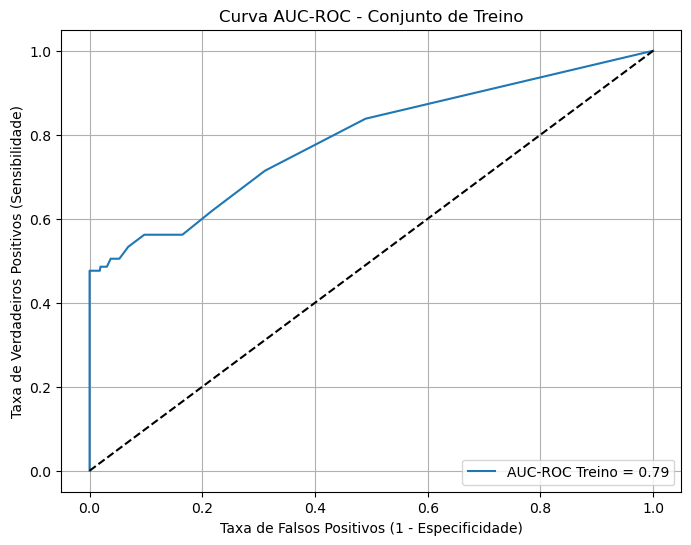

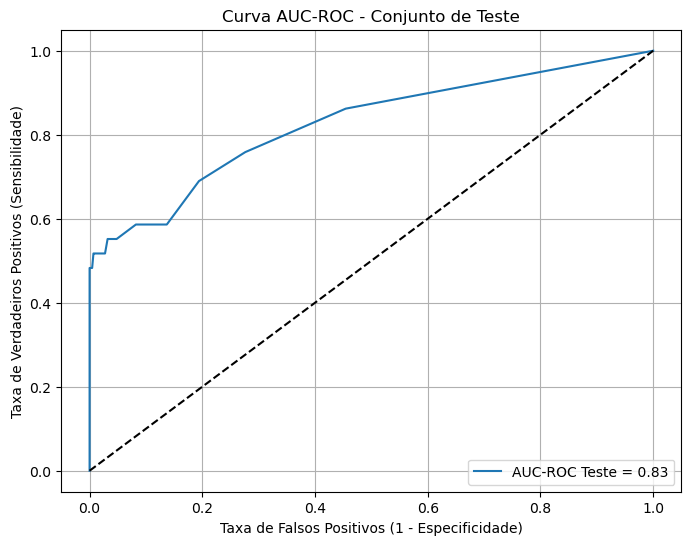

In [41]:
# Plotar a curva de AUC-ROC para o conjunto de treino
fpr_train, tpr_train, thresholds_train = roc_curve(y_train == 'SIM', y_probabilities)

plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, label=f'AUC-ROC Treino = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Taxa de Falsos Positivos (1 - Especificidade)')
plt.ylabel('Taxa de Verdadeiros Positivos (Sensibilidade)')
plt.title('Curva AUC-ROC - Conjunto de Treino')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Plotar a curva de AUC-ROC para o conjunto de teste
fpr_test, tpr_test, thresholds_test = roc_curve(y_test == 'SIM', y_test_probabilities)

plt.figure(figsize=(8, 6))
plt.plot(fpr_test, tpr_test, label=f'AUC-ROC Teste = {roc_auc_test:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Taxa de Falsos Positivos (1 - Especificidade)')
plt.ylabel('Taxa de Verdadeiros Positivos (Sensibilidade)')
plt.title('Curva AUC-ROC - Conjunto de Teste')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


### Conclusões e Recomendações:

Após realizar a análise dos dados, podemos constatar uma predominância de leads convertidos do setor de serviços, São Paulo mostrou uma taxa particularmente interessante na área de franqueadoras. Com base nessa observação, recomendamos direcionar esforços para melhorar a taxa de conversão no mercado de franquedoras em São Paulo, a fim de aumentar o número de clientes nessa região estratégica.

Outra recomendação importante é focar nos leads de empresas de porte médio, especialmente aquelas com 51-300 e 301-1000 funcionários. Esses segmentos demonstraram potencial de conversão significativo, e investir em estratégias direcionadas a esses nichos pode trazer resultados promissores.

Além disso, os resultados positivos obtidos com o inbound marketing indicam que a produção e divulgação de conteúdo são ferramentas efetivas para atrair leads e convertê-los em clientes. Portanto, é crucial continuar a investir nessa abordagem para atrair e nutrir leads em potenciais clientes.

Em resumo, para maximizar a taxa de conversão de leads em clientes, sugerimos:

1. Focar em estratégias específicas para o mercado de franquadoras em São Paulo, visando aumentar a taxa de conversão nessa região.

2. Investir em ações direcionadas às empresas de porte médio, com destaque para aquelas com 51-300 e 301-1000 funcionários, que demonstraram alto potencial de conversão.

3. Continuar a produção e divulgação de conteúdo, utilizando o inbound marketing como uma ferramenta efetiva para atrair e nutrir leads em potenciais clientes.

Bonus: O uso de um sistema integrado com algoritmos de Aprendizado de Máquina dos itens anteriores,pode representar um ganho bastante interessante de eficiência.


Essas recomendações podem ser essenciais para aprimorar as estratégias de marketing, aumentar a taxa de conversão de leads e impulsionar o crescimento e o sucesso do negócio.


Os resultados apresentados acima podem ser melhorados de várias maneiras,dentre elas:

1. Análise ainda mais fina da segmentação de clientes.Inclusão de mais análises específicas por estado.Análise de sazonalidade através da data de cadastro dos Leads.Também será muito interessante incluir plots geográficos(pode ser feito através do geopandas).

2. Implementação de testes de hipóteses para ter uma validação das taxas de conversão de cada método.

3. Melhora do uso de algoritmos de ML,comparação com outros modelos,geração de variáveis customizadas(feature engineering),melhor tratamento do desbalanceamento de classe(que é parte fundamental do problema de previsão),etc.